In [1]:
#imports
import numpy as np
from matplotlib import pyplot as plt
import os.path
import sys
import time
#from scipy.stats import chisquare
from keras.utils import normalize, to_categorical
import pandas as pd

Using TensorFlow backend.


In [2]:
# import datasets with time taken!
#smoll
start_time = time.time()
smoll = np.loadtxt("/home/willett/NeutrinoData/small_CNN_input_clean.txt", comments='#')
print("--- %s seconds ---" % (time.time() - start_time))
print(smoll.shape)

#and the full
start_time = time.time()
fll = np.loadtxt("/home/willett/NeutrinoData/full_CNN_input_clean.txt", comments='#')
print("--- %s seconds ---" % (time.time() - start_time))
print(fll.shape)

#numpy uses c!

--- 0.055240631103515625 seconds ---
(247, 21)
--- 2.0513241291046143 seconds ---
(57851, 21)


In [3]:
#initial column titles
title = "Row sigBg  FirstLaye  LastLayer NHits  AverageZP Thrust  PID_Angle  PID_Front  PID_LLR_M  FirstLaye  LastLayer  NHits_Low  AverageZP  Thrust_Lo  PID_Angle  PID_Front  PID_LLR_M  Energy_As  Angle_Bet  Distance_Bet"
#final column titles
titlef = " FirstLayer_H  LastLayer_H NHits_H  AverageZP_H Thrust_H  PID_Angle_H  PID_Front_H  PID_LLR_M_H  FirstLayer_L  LastLayer_L  NHits_L  AverageZP_L  Thrust_L  PID_Angle_L  PID_Front_L  PID_LLR_M_L  Energy_As  Angle_Bet  Distance_Bet   Sig   Bg"


## Preprocessing Small


In [4]:
#useful variables
SmllLngth = 247

#removing row number
Smoll2 = smoll[:,1:5000]
print(Smoll2[0,:], Smoll2.shape)

[-9.9900000e+02  9.0000000e+00  3.0000000e+01  2.6000000e+01
  6.1138464e+02  9.9445040e-01  4.9888916e+01  6.7961200e-02
  3.4687889e+01  2.0000000e+00  3.1000000e+01  1.4000000e+01
  5.7600000e+02  9.6934470e-01  4.9888916e+01  6.7961200e-02
  1.3910054e+00  7.5552750e-01  1.7113097e+00  6.7944533e+02] (247, 20)


In [5]:
#splitting into Data and SigBg
SigBgSmll = Smoll2[:,0]
SmllData = Smoll2[:,1:550]
print(SigBgSmll.shape,SmllData.shape) # expect shape (247,18) 20 -1(row) -1(SigBg) = 18
print(SmllData[0,:])


(247,) (247, 19)
[9.0000000e+00 3.0000000e+01 2.6000000e+01 6.1138464e+02 9.9445040e-01
 4.9888916e+01 6.7961200e-02 3.4687889e+01 2.0000000e+00 3.1000000e+01
 1.4000000e+01 5.7600000e+02 9.6934470e-01 4.9888916e+01 6.7961200e-02
 1.3910054e+00 7.5552750e-01 1.7113097e+00 6.7944533e+02]


In [6]:
#One hot vector for SigBg 

#first find SigBg binary
SigIndexSmll = np.where(SigBgSmll == 10 )
SigBgBi = np.zeros((SmllLngth,1))
np.put(SigBgBi,SigIndexSmll,1)
#print(SigBgBi)

# the SigBg column should be two where [1,0] = sig and [0,1] = Bg for keras.
OHSmll = to_categorical(SigBgBi, num_classes=2)
OHSmll2 = np.flip(OHSmll,axis = 1)
print(OHSmll2)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [7]:
# normalising small data
SmllData2 = normalize(SmllData)
print(SmllData.shape,"\n",SmllData2.shape)

(247, 19) 
 (247, 19)


In [8]:
# recombining small data

smollP = np.zeros((247,21))
smollP[:,-2:660] = OHSmll2
smollP[:,0:-2] = SmllData2



print(titlef)
print(smollP.shape)
print(SmllData2[0,:])

 FirstLayer_H  LastLayer_H NHits_H  AverageZP_H Thrust_H  PID_Angle_H  PID_Front_H  PID_LLR_M_H  FirstLayer_L  LastLayer_L  NHits_L  AverageZP_L  Thrust_L  PID_Angle_L  PID_Front_L  PID_LLR_M_L  Energy_As  Angle_Bet  Distance_Bet   Sig   Bg
(247, 21)
[8.29847538e-03 2.76615846e-02 2.39733733e-02 5.63728932e-01
 9.16935796e-04 4.60002157e-02 6.26638161e-05 3.19840659e-02
 1.84410564e-03 2.85836374e-02 1.29087395e-02 5.31102425e-01
 8.93787015e-04 4.60002157e-02 6.26638161e-05 1.28258045e-03
 6.96636262e-04 1.57791794e-03 6.26484483e-01]


## Preprocessing Full 

In [9]:
# useful values 
fllLength = fll.shape[0]

#splittng into SigBg and data and removing row simultaneously!
SigBgFll = fll[:,1]
FllData = fll[:,2:255 ]

print(fll[0,],fll.shape)
print(SigBgFll[0:4], SigBgFll.shape)
print(FllData[0,] , FllData.shape)
print(fllLength)


[ 0.0000000e+00 -9.9900000e+02  9.0000000e+00  3.0000000e+01
  2.6000000e+01  6.1138464e+02  9.9445040e-01  4.9888916e+01
  6.7961200e-02  3.4687889e+01  2.0000000e+00  3.1000000e+01
  1.4000000e+01  5.7600000e+02  9.6934470e-01  4.9888916e+01
  6.7961200e-02  1.3910054e+00  7.5552750e-01  1.7113097e+00
  6.7944533e+02] (57851, 21)
[-999. -999. -999. -999.] (57851,)
[9.0000000e+00 3.0000000e+01 2.6000000e+01 6.1138464e+02 9.9445040e-01
 4.9888916e+01 6.7961200e-02 3.4687889e+01 2.0000000e+00 3.1000000e+01
 1.4000000e+01 5.7600000e+02 9.6934470e-01 4.9888916e+01 6.7961200e-02
 1.3910054e+00 7.5552750e-01 1.7113097e+00 6.7944533e+02] (57851, 19)
57851


In [10]:
# one hot vector for SigBg

SigIndexFll = np.where(SigBgFll == 10)
SigBgBiFll = np.zeros((fllLength,1))
np.put(SigBgBiFll,SigIndexFll , 1)


# the SigBg column should be two where [1,0] = sig and [0,1] = Bg for keras.
OHFll = to_categorical(SigBgBiFll, num_classes=2)
OHFll2 = np.flip(OHFll,axis = 1)
print(OHFll2[0:10,:])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [11]:
# Data normalisation
FllData2 = normalize(FllData)

In [12]:
# recombine them!
fllP = np.zeros((fllLength,21))
fllP[:,-2:5000] = OHFll2
fllP[:,0:-2] = FllData2

# done!

## split full into test and train

In [13]:
print(fllP.shape)
Te = int(0.8*57851) # 80% split
Tr = fllLength - Te 
print(Te, Tr)

fllP2 = fllP[:46280,:]
fllPT = fllP[46280:,:]
print(fllP2.shape)
print(fllPT.shape)

(57851, 21)
46280 11571
(46280, 21)
(11571, 21)


## And save!

In [14]:
#small
start_time = time.time()
np.savetxt("/home/willett/NeutrinoData/small_CNN_input_processed.txt",smollP, header= titlef)
np.savetxt("/home/willett/NeutrinoData/small_CNN_input_processed.txt.gz",smollP, header= titlef)
print("--- %s seconds ---" % (time.time() - start_time))

#full train
start_time = time.time()
np.savetxt("/home/willett/NeutrinoData/full_CNN_input_processed.txt",fllP2, header=titlef )
np.savetxt("/home/willett/NeutrinoData/full_CNN_input_processed.txt.gz",fllP2, header= titlef)
print("--- %s seconds ---" % (time.time() - start_time))

#full test
start_time = time.time()
np.savetxt("/home/willett/NeutrinoData/test_CNN_input_processed.txt",fllPT, header=titlef )
np.savetxt("/home/willett/NeutrinoData/test_CNN_input_processed.txt.gz",fllPT, header= titlef)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.17406177520751953 seconds ---
--- 7.473952293395996 seconds ---
--- 1.9640300273895264 seconds ---


## but now, i want to clean it too.

In [15]:
# Convert feature matrix into DataFrame
df = pd.DataFrame(fllP2, )

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.999)]

print(to_drop[:])

titleArr = titlef.split() 

#what needs to be dropped?
for i in range(len(to_drop)):
    print(titlef.split()[to_drop[i]])

    
# remove those columns
ColumnDropIndex = np.array(to_drop[:-1])
fllPC = np.delete(fllP2,ColumnDropIndex,axis = 1 )
CtitleArr = np.delete(titleArr,ColumnDropIndex)
print(fllPC[0,:])

[12, 13, 14, 16, 17, 20]
Thrust_L
PID_Angle_L
PID_Front_L
Energy_As
Angle_Bet
Bg
[8.29847538e-03 2.76615846e-02 2.39733733e-02 5.63728932e-01
 9.16935796e-04 4.60002157e-02 6.26638161e-05 3.19840659e-02
 1.84410564e-03 2.85836374e-02 1.29087395e-02 5.31102425e-01
 1.28258045e-03 6.26484483e-01 0.00000000e+00 1.00000000e+00]


In [16]:
# remove the anomylous datapoint
fllPC2 = np.delete(fllPC,np.where(fllPC[:,4]<-0.1), axis=0)


In [17]:
#pick dataset to plot
UD = fllPC2

#seperate signal and background
UDSig = UD[   np.where(    UD[:,14]==1     )   ]
UDBg = UD[   np.where(    UD[:,14]!=1     )   ]
print(UDSig.shape, UDBg.shape)

(1148, 16) (44897, 16)


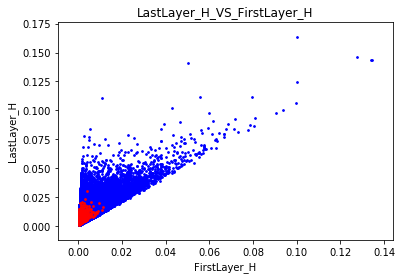

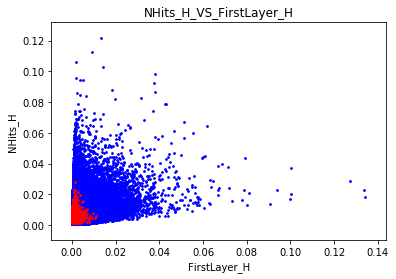

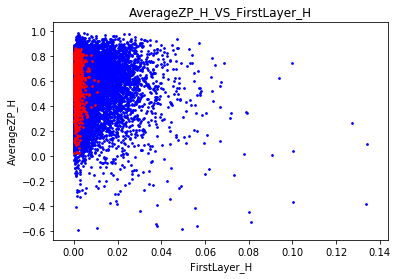

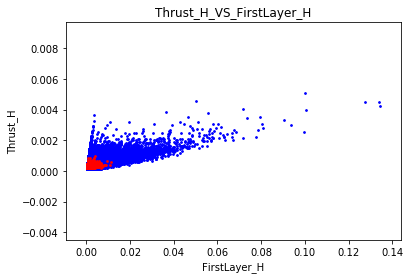

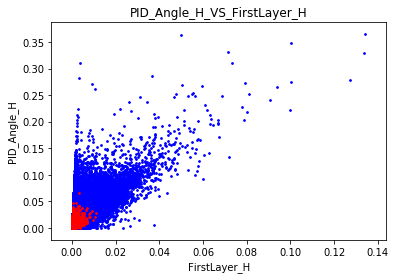

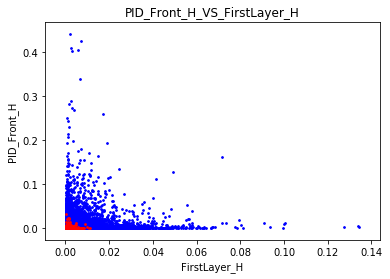

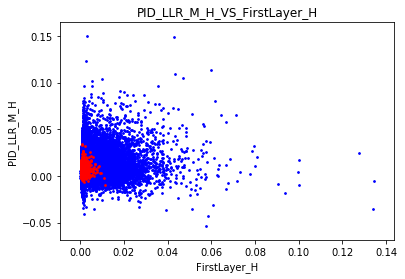

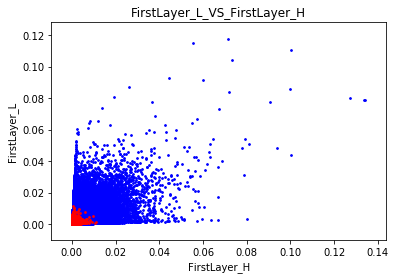

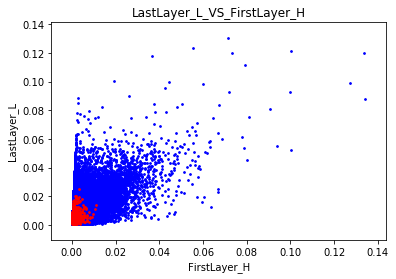

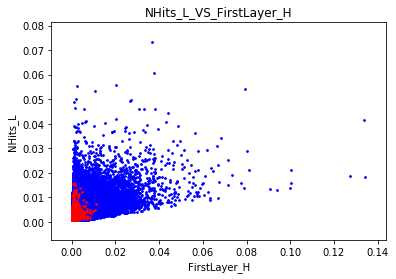

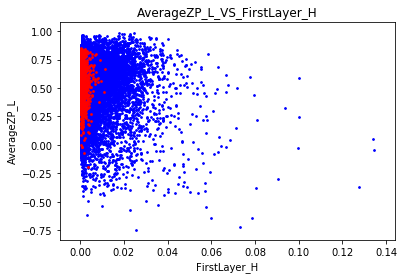

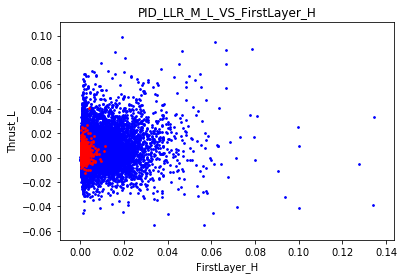

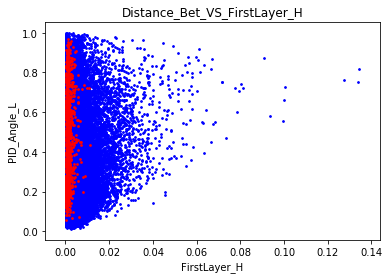

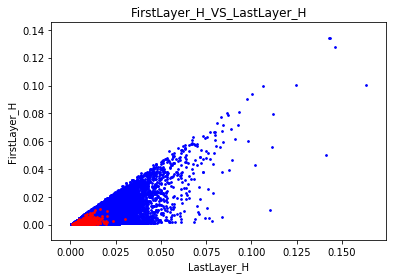

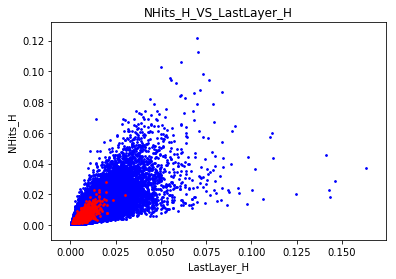

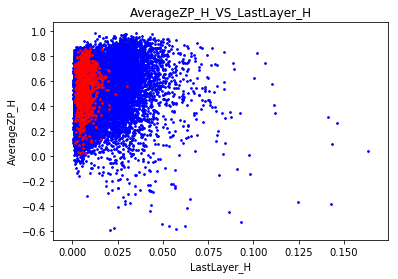

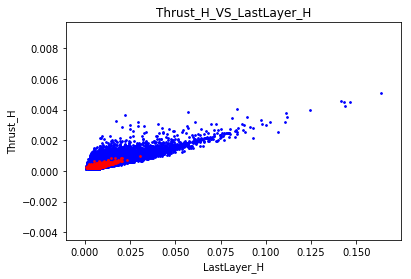

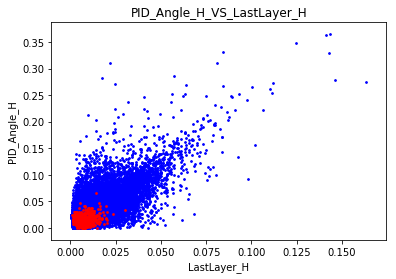

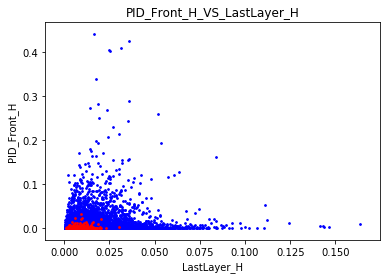

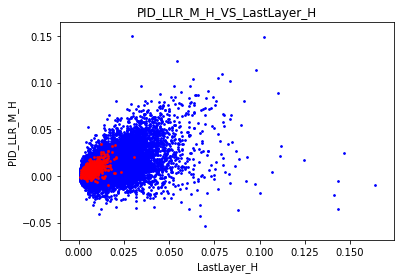

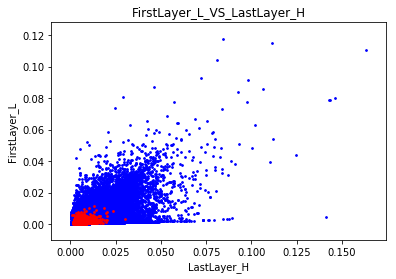

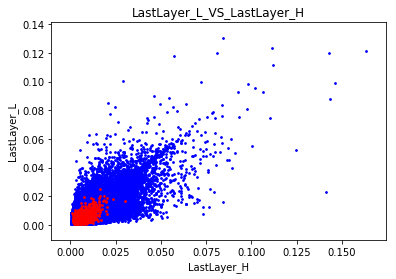

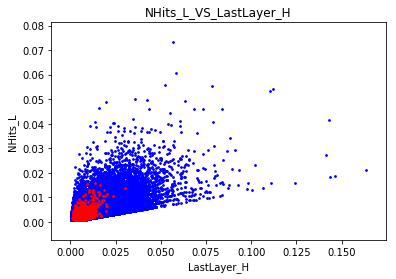

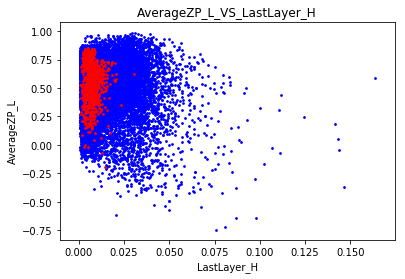

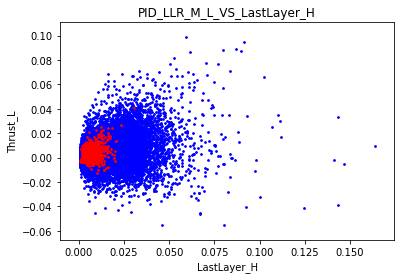

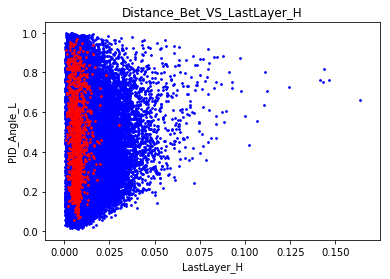

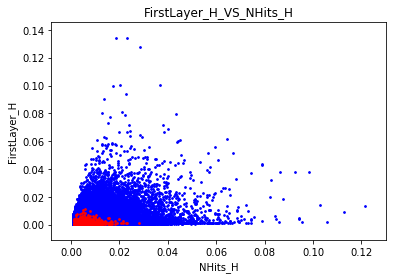

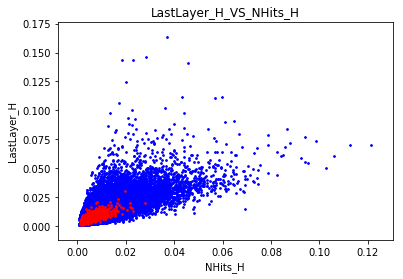

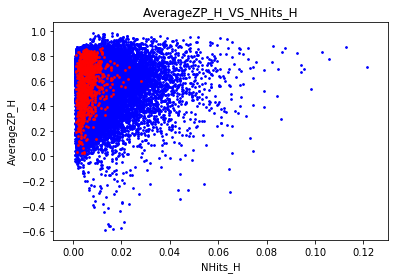

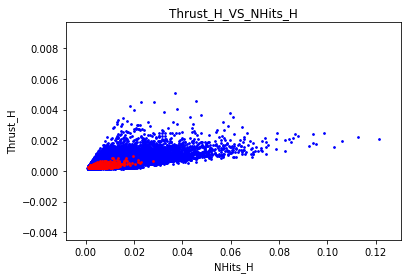

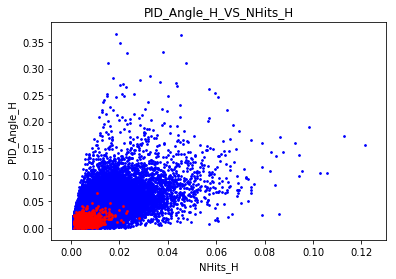

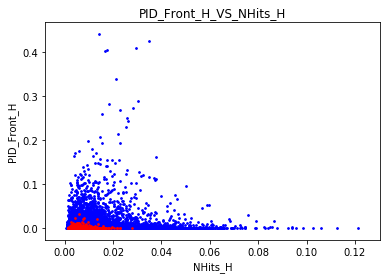

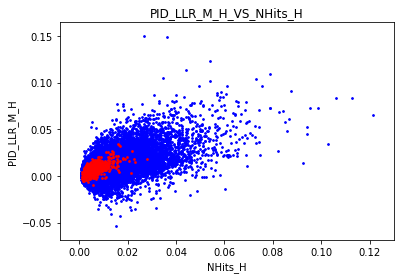

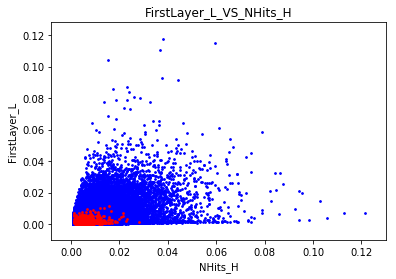

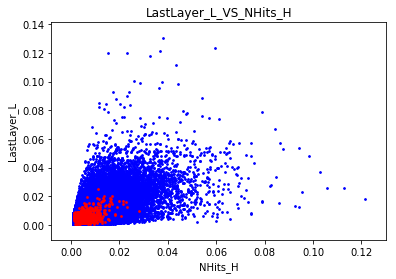

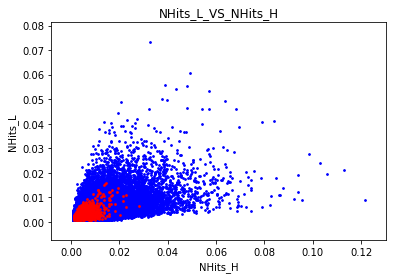

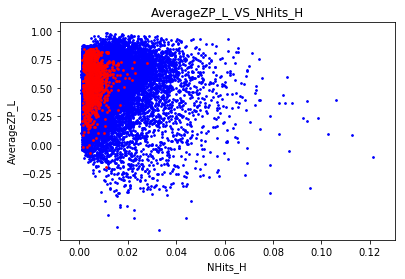

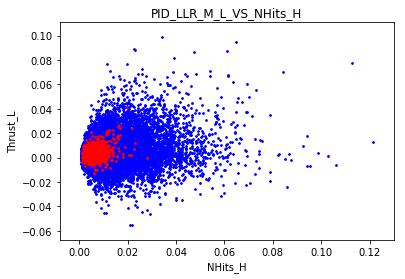

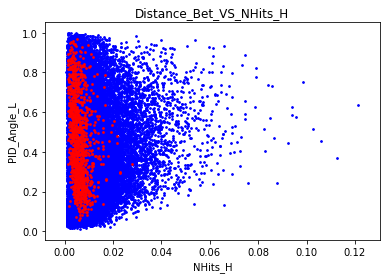

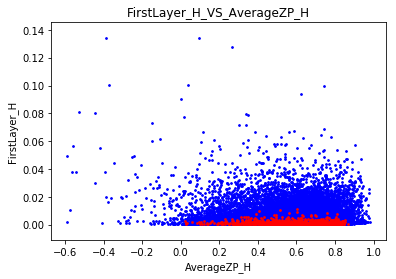

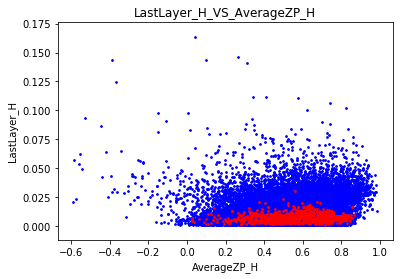

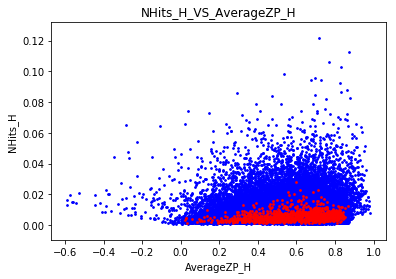

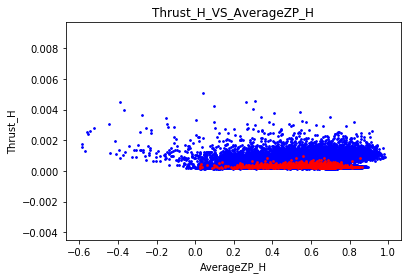

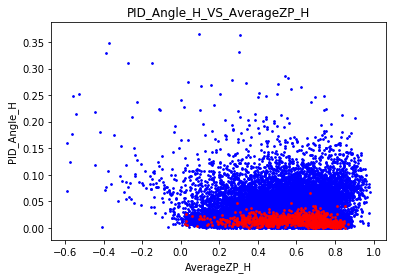

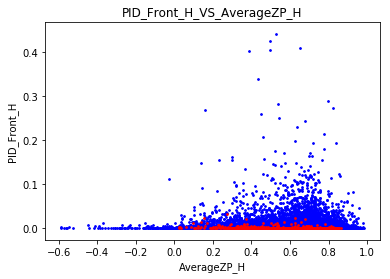

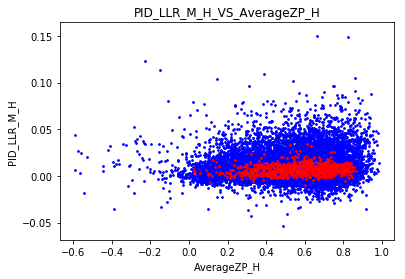

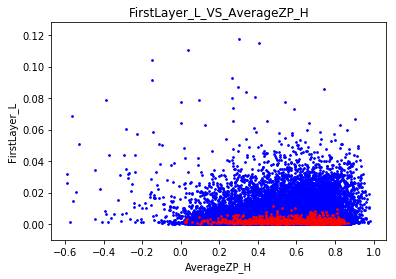

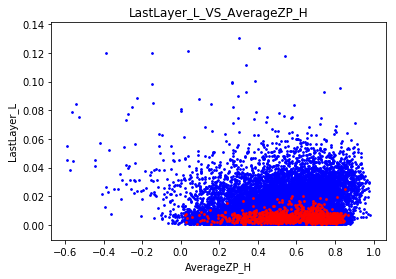

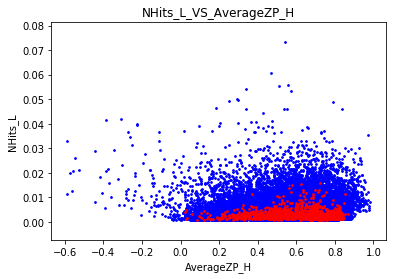

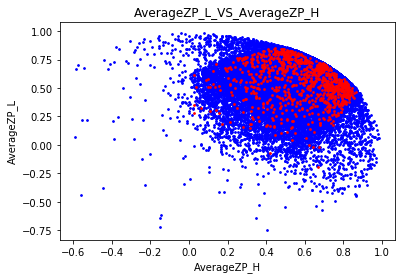

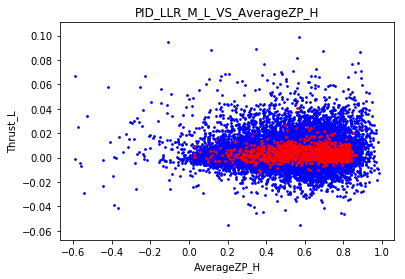

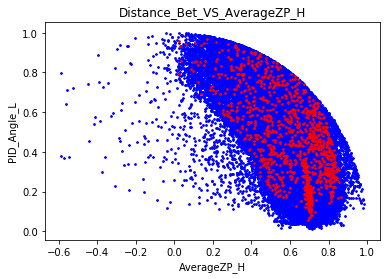

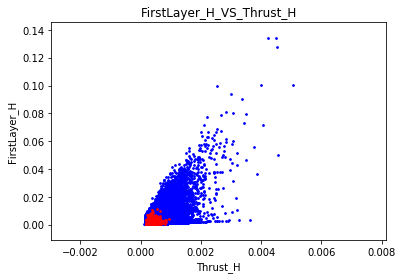

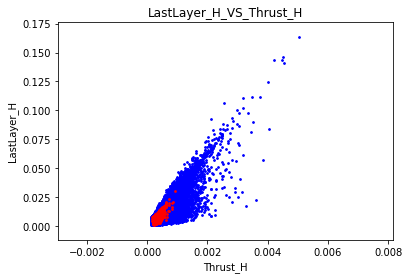

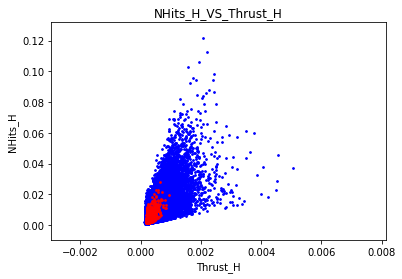

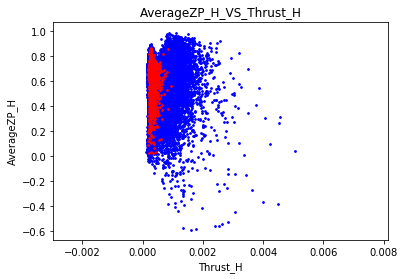

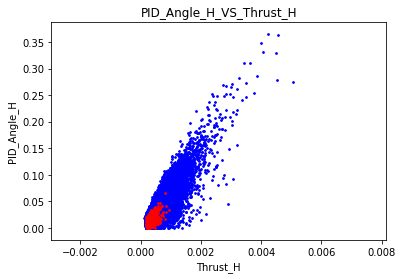

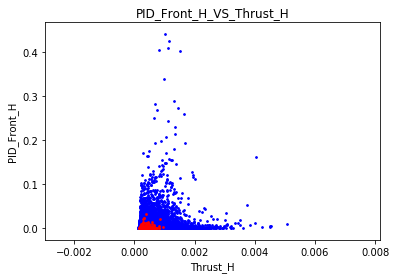

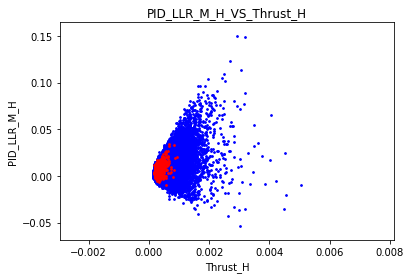

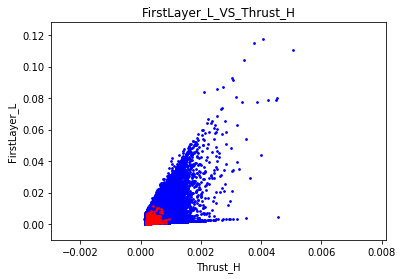

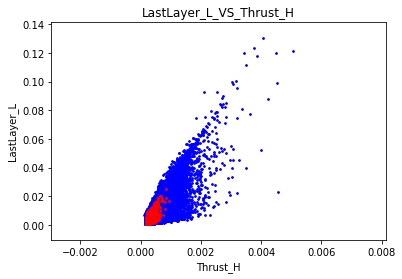

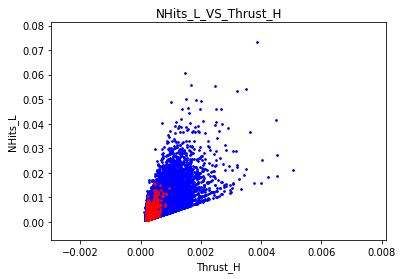

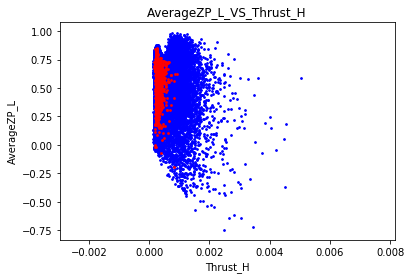

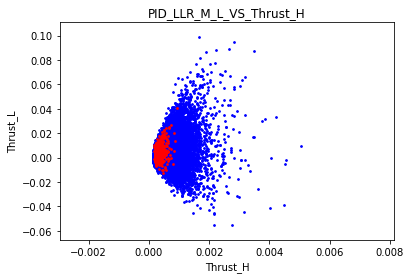

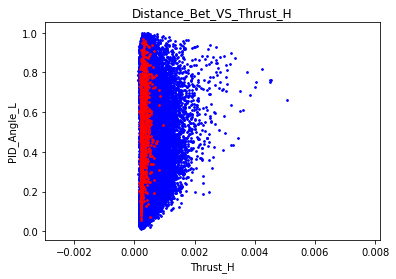

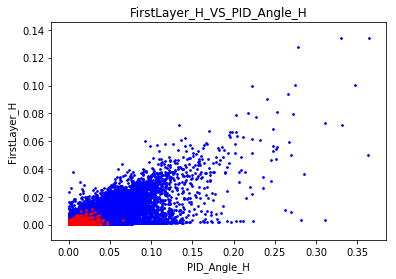

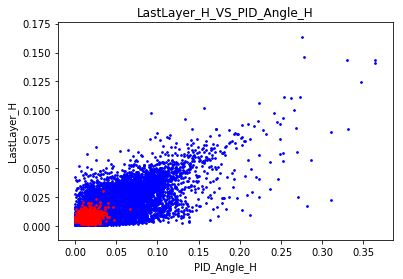

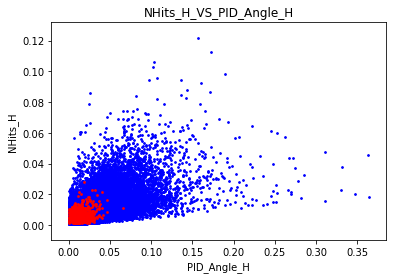

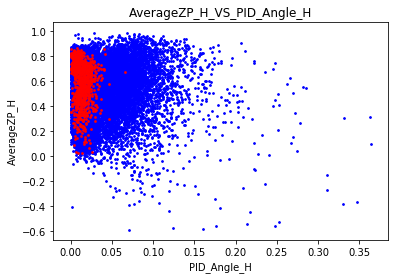

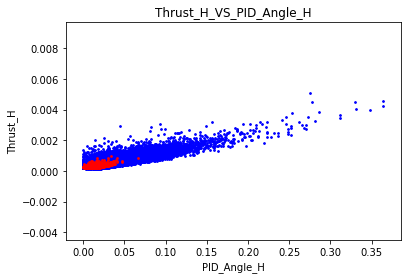

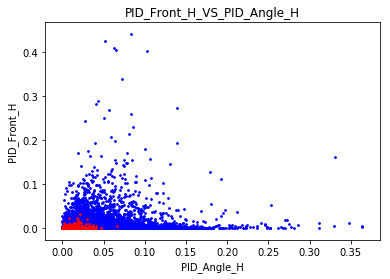

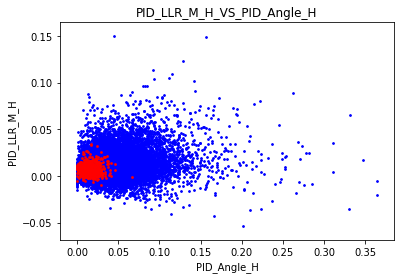

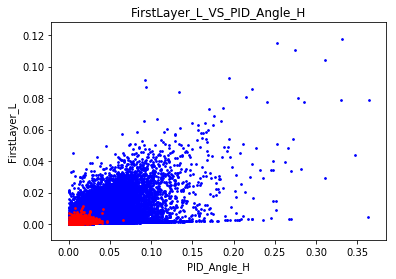

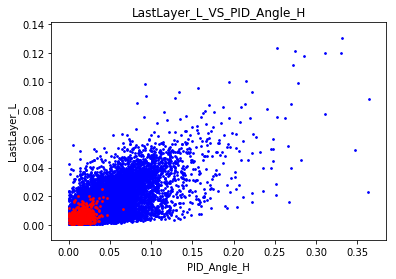

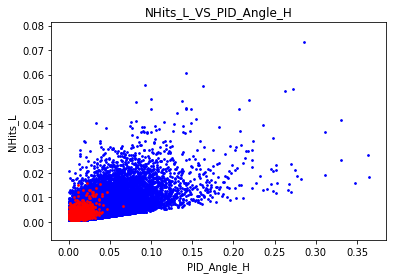

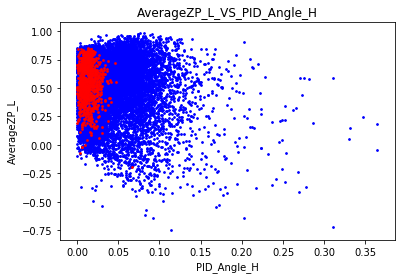

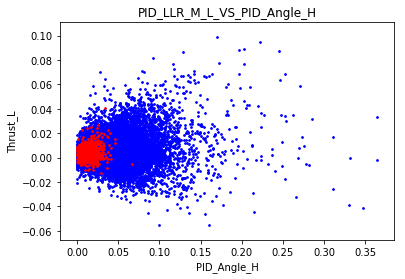

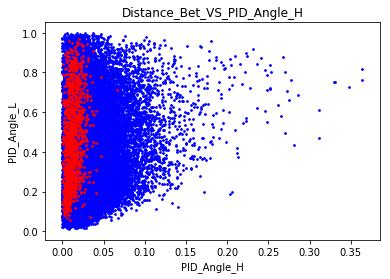

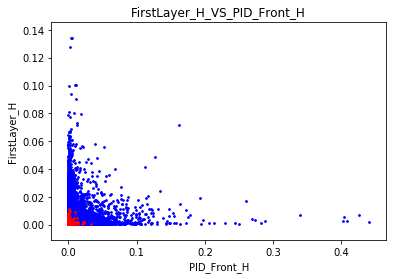

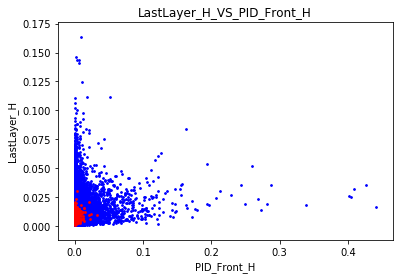

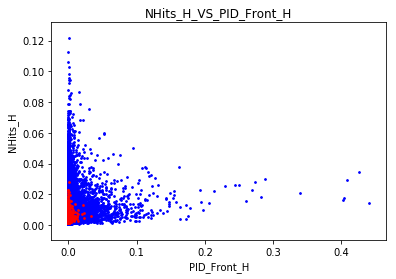

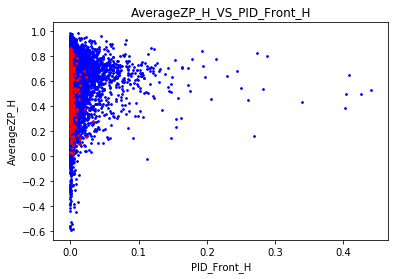

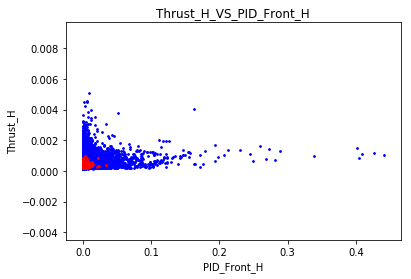

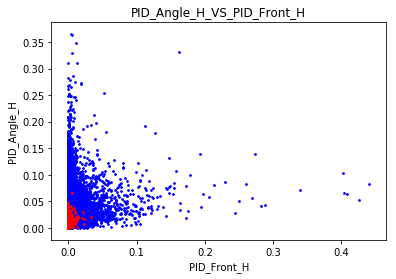

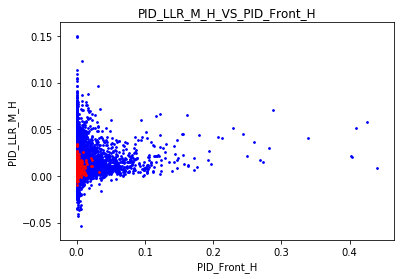

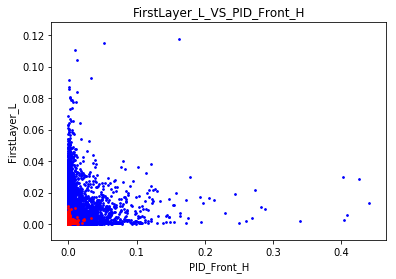

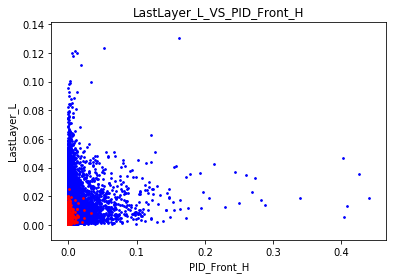

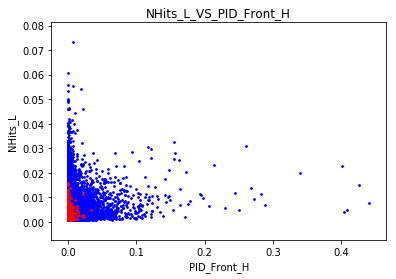

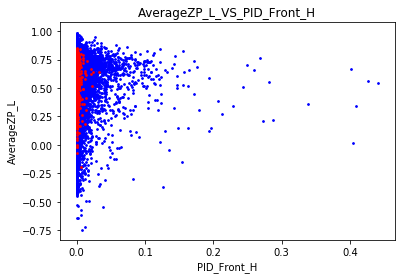

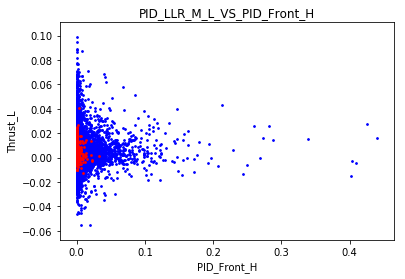

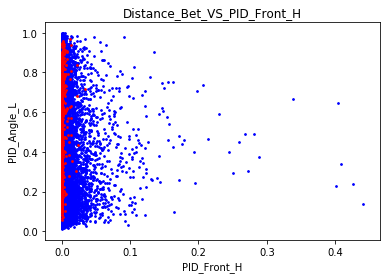

--- 42.65885829925537 seconds ---


In [18]:
#superplot!
size = 3
#save_results_to = '/home/willett/ANNs/HumanDataAPlots/'

start_time = time.time()

for i in np.arange(7):
    for j in np.arange(14):
        if i!=j:
            plottitle = CtitleArr[j]+"_VS_"+CtitleArr[i]
            
            plt.scatter(UDBg[:,i],UDBg[:,j],c="b",s=size)
            plt.scatter(UDSig[:,i],UDSig[:,j],c="r",s=size)
            plt.title(plottitle)
            plt.ylabel(titleArr[j])
            plt.xlabel(titleArr[i])
            #plt.savefig(save_results_to + plottitle, dpi = 300)
                
            plt.show()
            
print("--- %s seconds ---" % (time.time() - start_time)) 

In [19]:
# trimming unwanted background
"""
'FirstLayer_H0' 
'LastLayer_H1' 
'NHits_H2' 
'AverageZP_H3' 
'Thrust_H4'
'PID_Angle_H5' 
'PID_Front_H6' 
'PID_LLR_M_H7 not trimmable' 
'FirstLayer_L8' 
'LastLayer_L9'
'NHits_L10' 
'AverageZP_L11' 
'PID_LLR_M_L12 not trimmable' 
'Distance_Bet13 not trimmable'
"""
RemoveIndex =(fllPC2[:,0]>0.0125)\
 | (fllPC2[:,1]>0.03)\
 | (fllPC2[:,2]>0.03)\
 | (fllPC2[:,3]<-0.1)\
 | (fllPC2[:,4]>0.002)\
 | (fllPC2[:,5]>0.08)\
 | (fllPC2[:,6]>0.04)\
 | (fllPC2[:,8]>0.0125)\
 | (fllPC2[:,9]>0.04)\
 | (fllPC2[:,10]>0.025)\
 | (fllPC2[:,11]<-0.25)

KeepIndex = np.logical_not(RemoveIndex)

# placing in new table
fllPC3 = fllPC2[KeepIndex]

print(KeepIndex[27:190])
print(fllPC3.shape, fllPC2.shape)



[ True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False  True  True  True False  True
 False  True  True  True False  True  True  True  True False  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True False
  True  True  True False False  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True False False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True  True False  True  True  True  True False  True
  True  True False  True False  True  True]
(39719,

In [20]:
#print(CtitleArr)
sep=" "
Ctitle = sep.join(CtitleArr)
print(Ctitle)


FirstLayer_H LastLayer_H NHits_H AverageZP_H Thrust_H PID_Angle_H PID_Front_H PID_LLR_M_H FirstLayer_L LastLayer_L NHits_L AverageZP_L PID_LLR_M_L Distance_Bet Sig Bg


In [21]:
#pick dataset to plot
UD = fllPC3

#seperate signal and background
UDSig = UD[   np.where(    UD[:,14]==1     )   ]
UDBg = UD[   np.where(    UD[:,14]!=1     )   ]
print(UDSig.shape, UDBg.shape)

(1147, 16) (38572, 16)


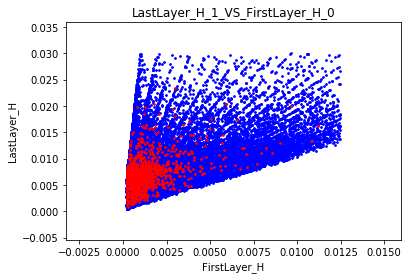

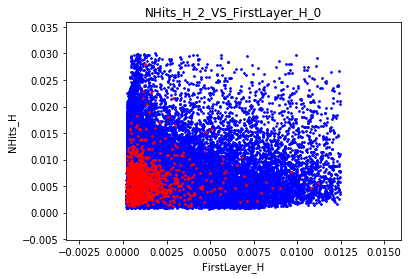

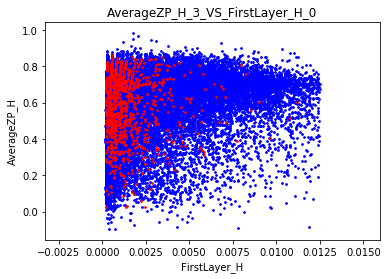

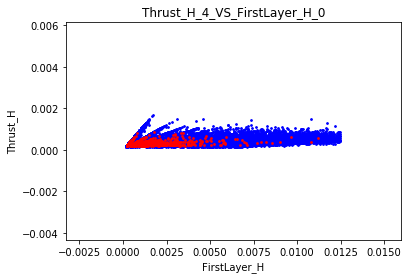

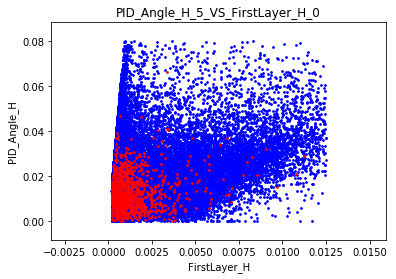

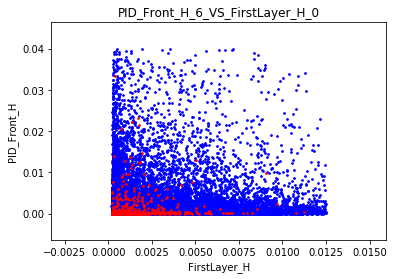

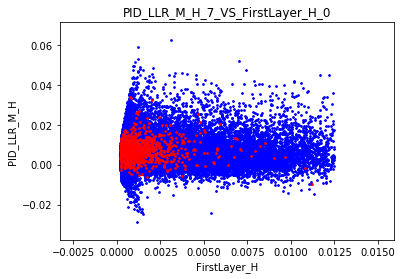

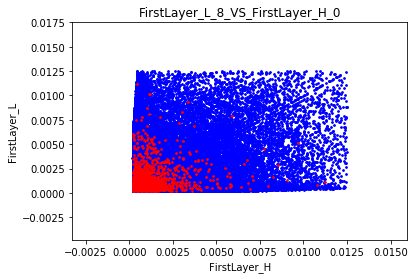

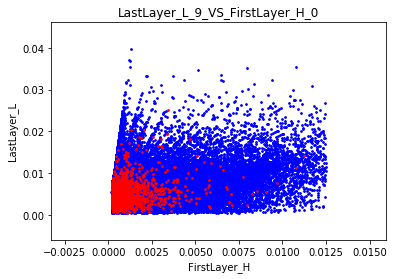

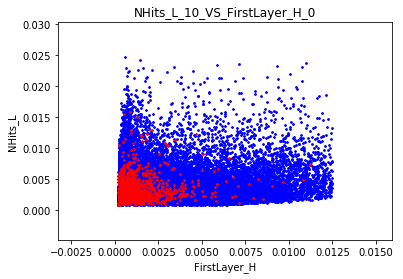

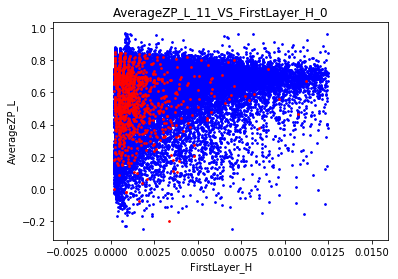

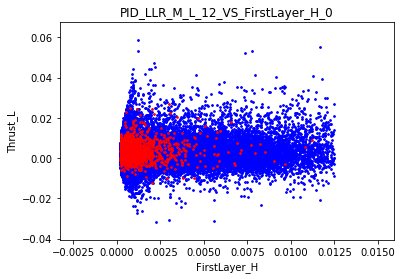

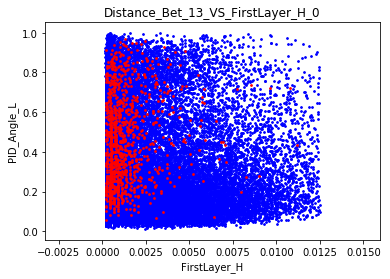

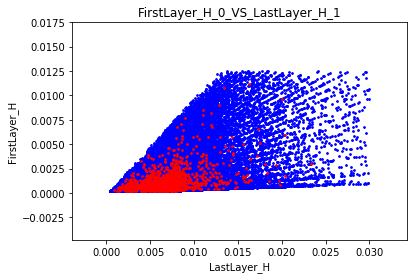

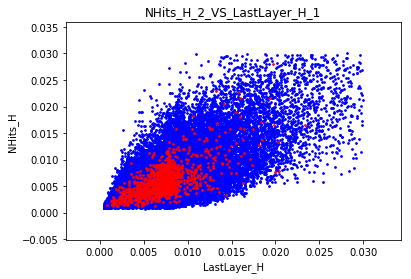

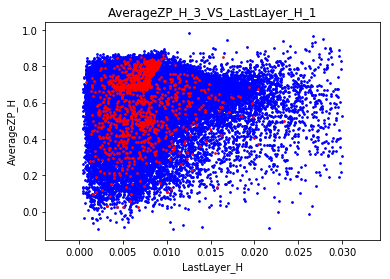

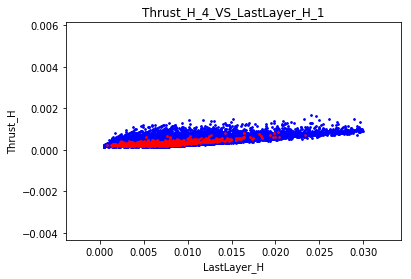

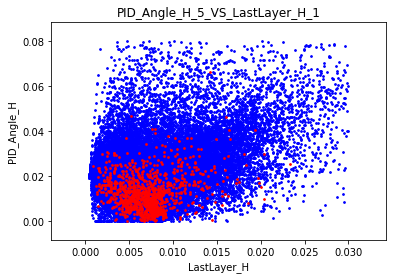

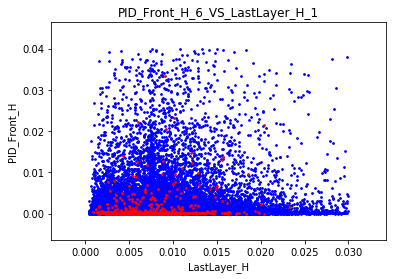

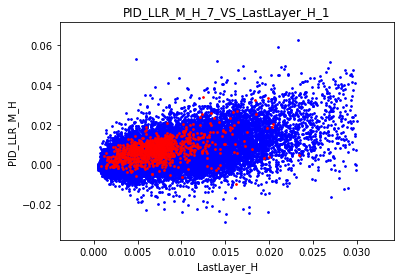

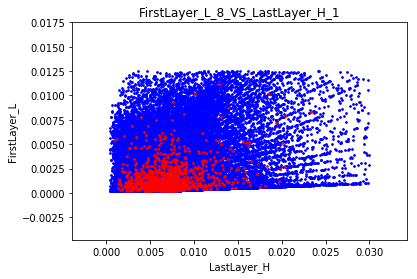

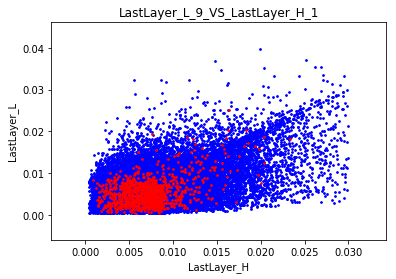

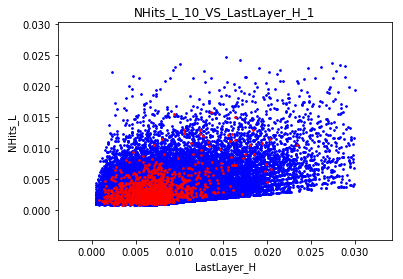

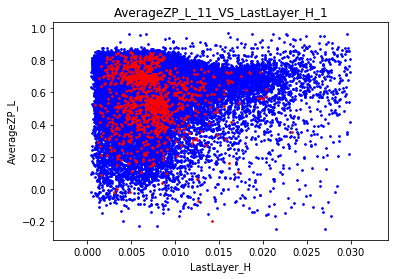

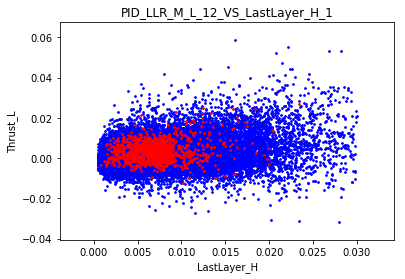

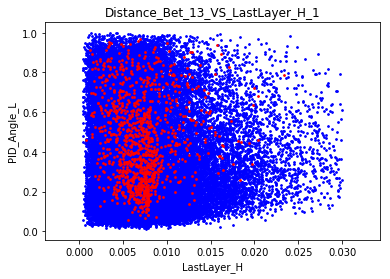

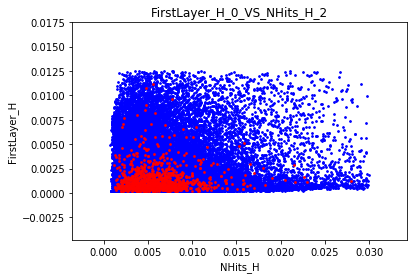

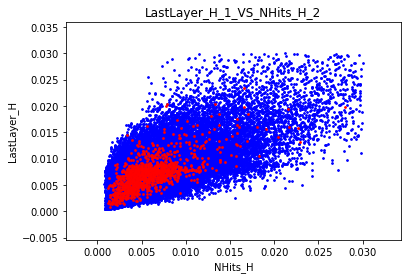

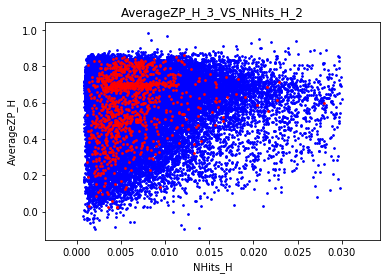

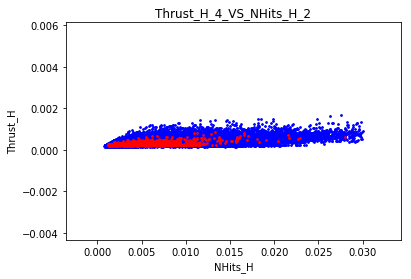

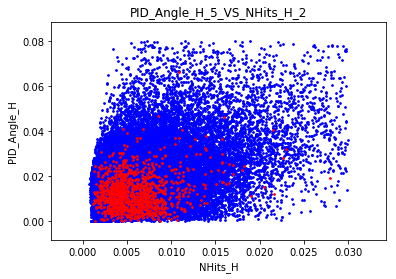

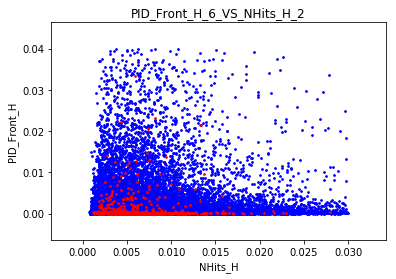

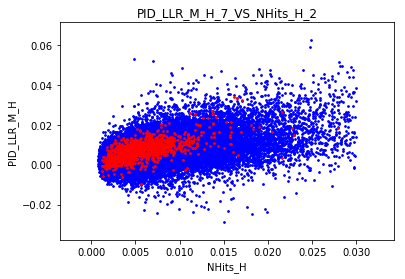

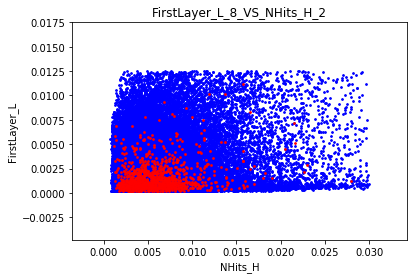

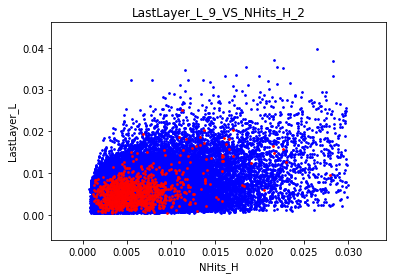

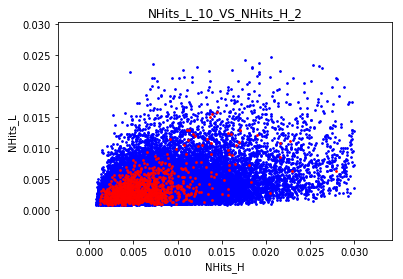

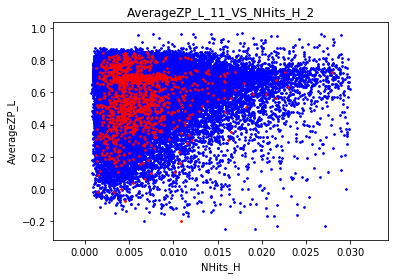

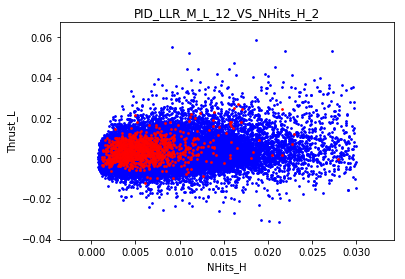

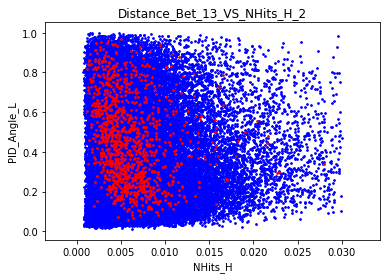

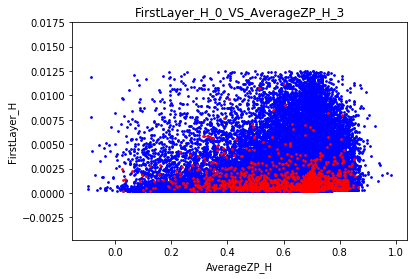

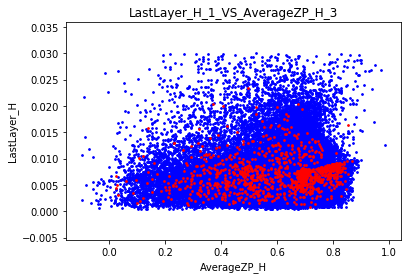

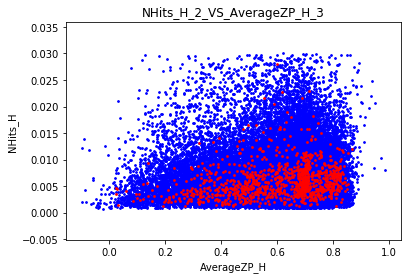

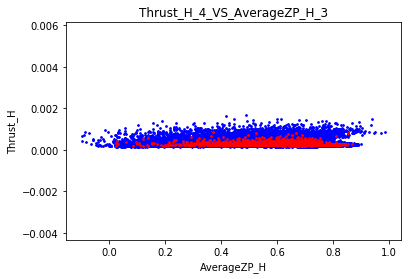

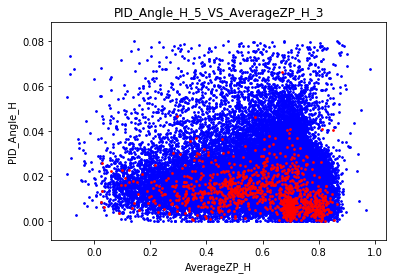

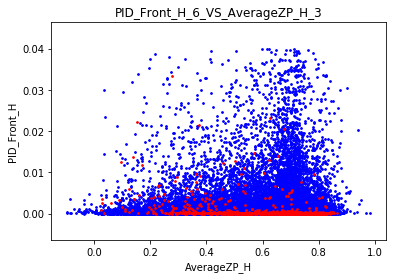

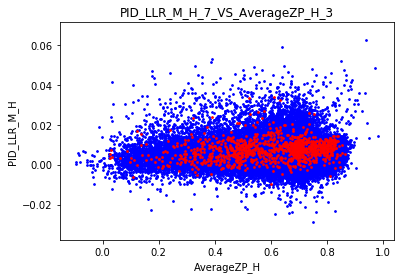

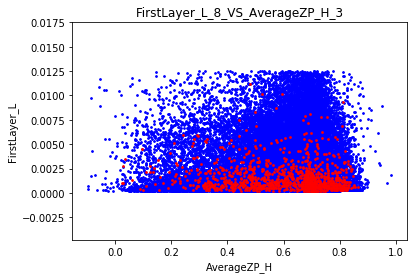

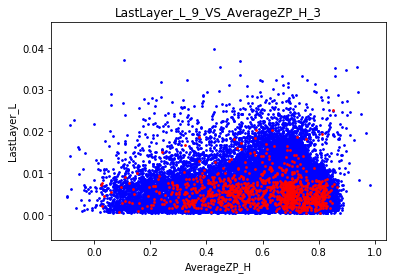

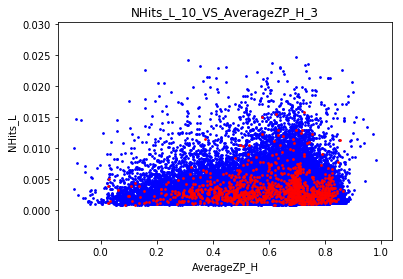

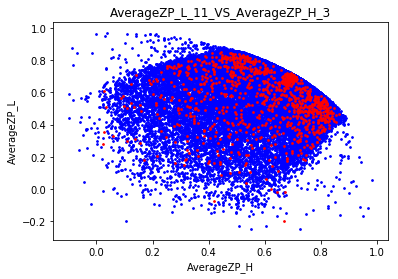

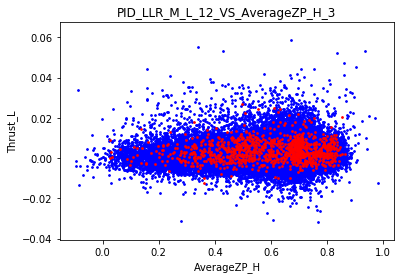

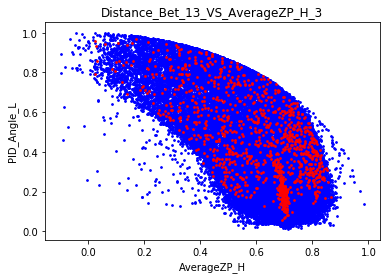

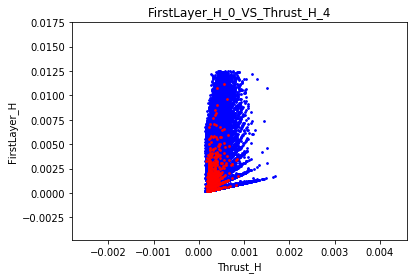

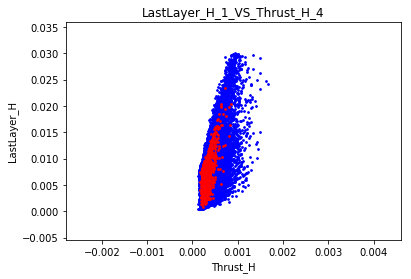

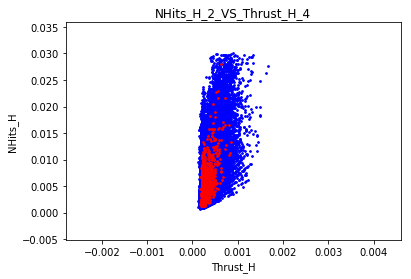

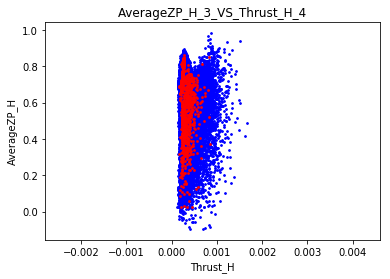

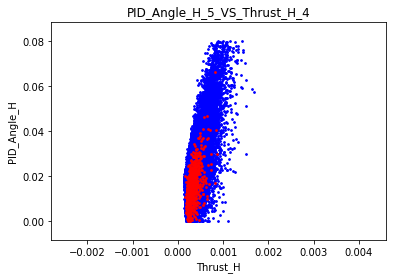

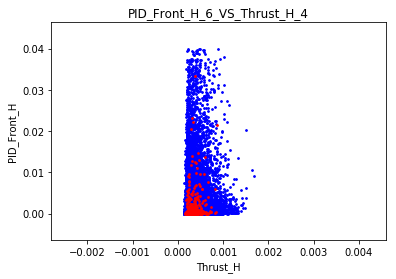

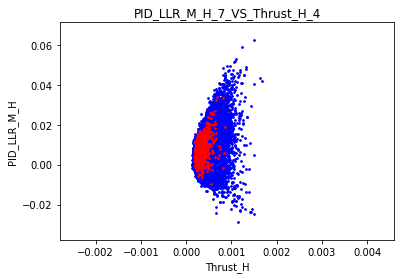

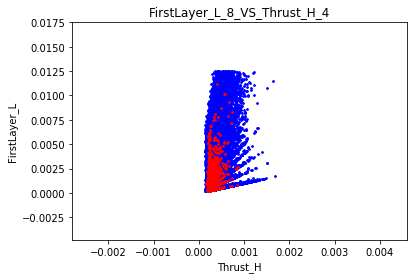

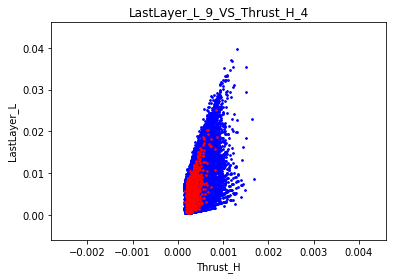

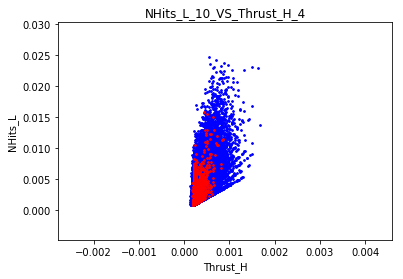

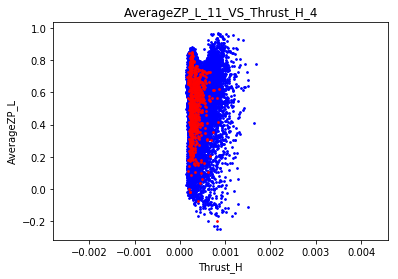

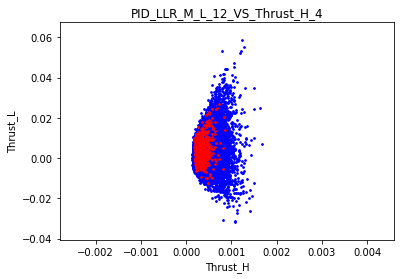

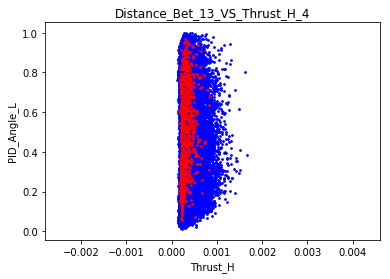

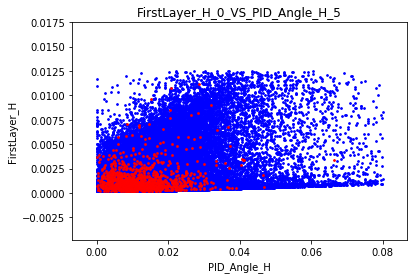

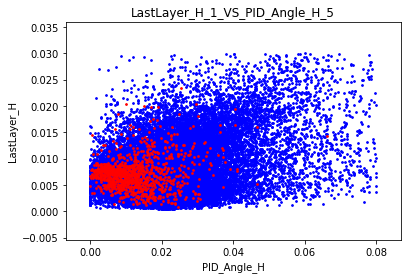

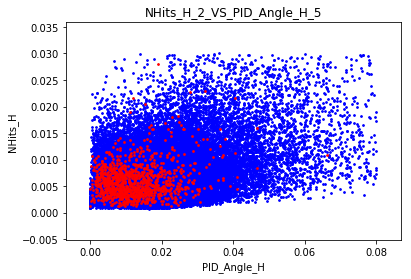

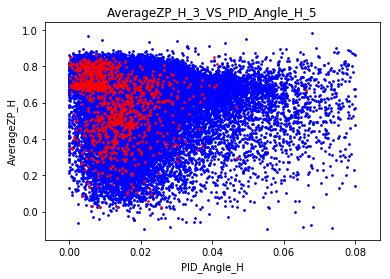

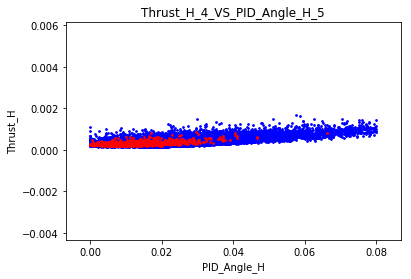

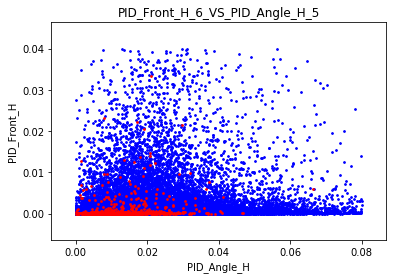

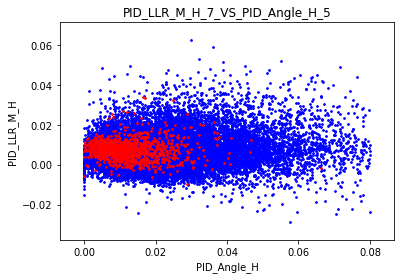

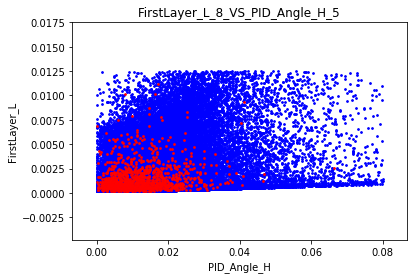

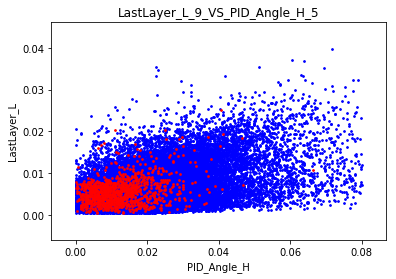

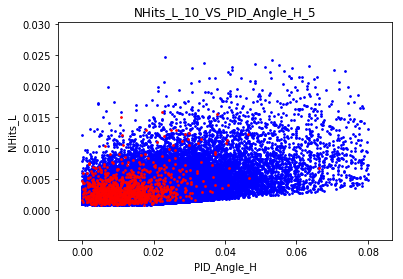

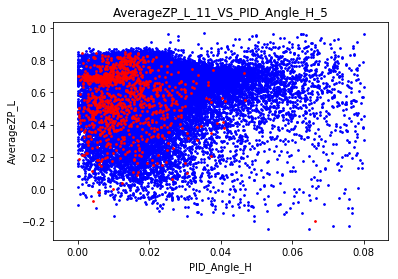

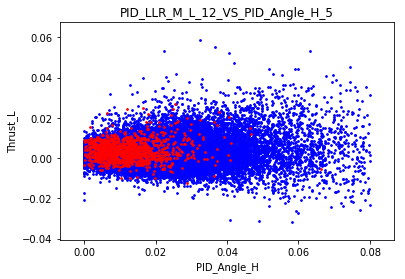

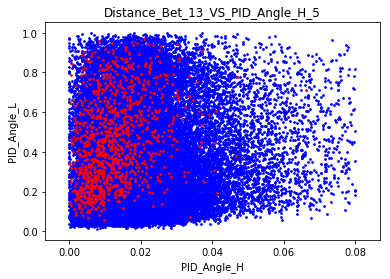

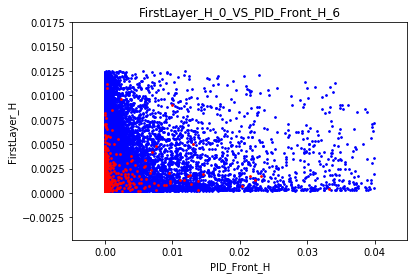

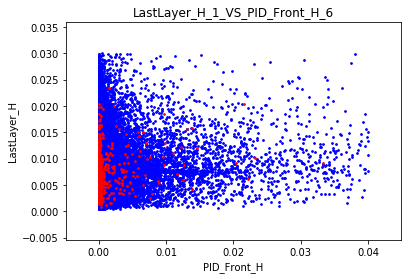

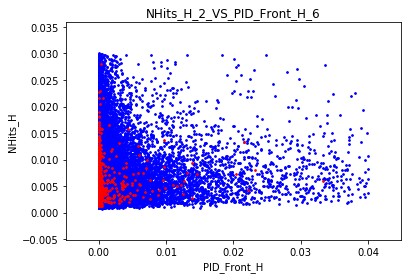

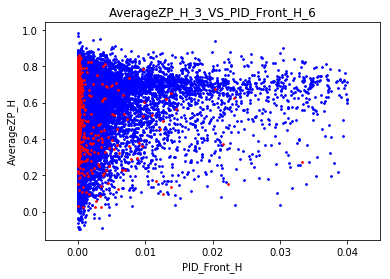

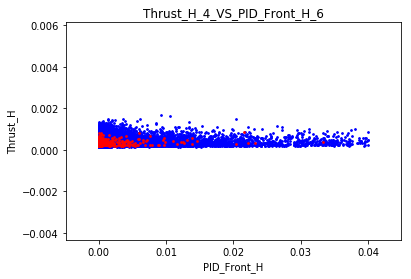

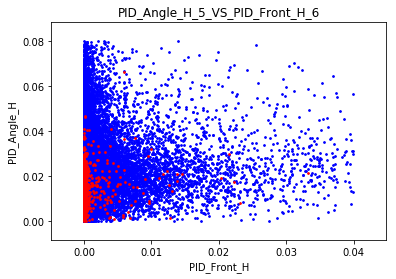

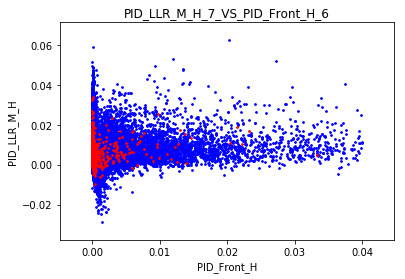

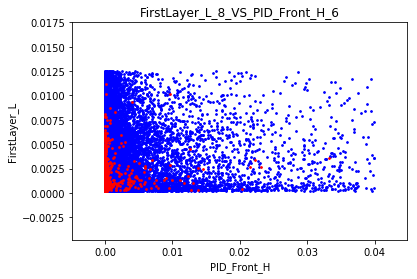

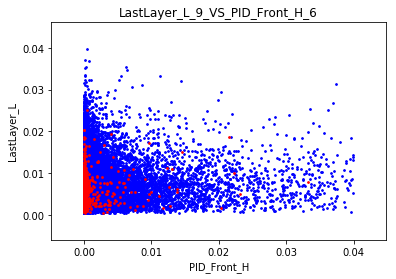

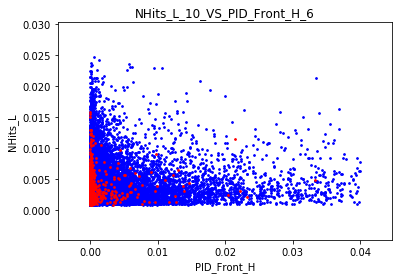

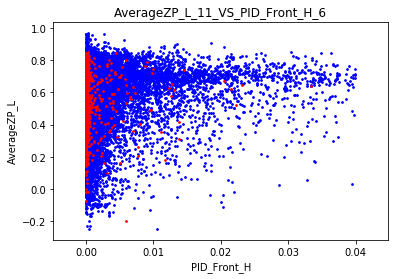

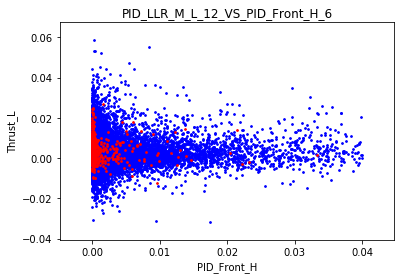

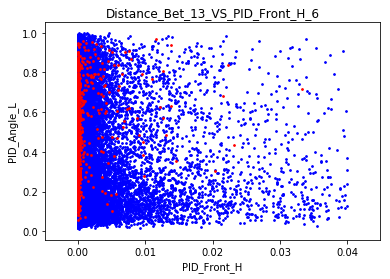

--- 84.58959197998047 seconds ---


In [22]:
#superplot!
size = 3
save_results_to = '/home/willett/ANNs/HumanCleanedPlots/'

start_time = time.time()

for i in np.arange(7):
    for j in np.arange(14):
        if i!=j:
            plottitle = CtitleArr[j]+"_"+str(j)+"_VS_"+CtitleArr[i]+"_"+str(i)
            
            plt.scatter(UDBg[:,i],UDBg[:,j],c="b",s=size)
            plt.scatter(UDSig[:,i],UDSig[:,j],c="r",s=size)
            plt.title(plottitle)
            plt.ylabel(titleArr[j])
            plt.xlabel(titleArr[i])
            plt.savefig(save_results_to + plottitle, dpi = 300)
                
            plt.show()
            
print("--- %s seconds ---" % (time.time() - start_time)) 

In [23]:
# with the trimming done, now its time to create a 50-50 ratio

SigI = np.where(fllPC3[:,14] == 1)[0] 
BgI= np.where(fllPC3[:,14] == 0)[0]
SigN = SigI.size       # how much signal there is
BgN = BgI.size         # how much background there is
Multip = int(BgN/SigN) # how much more signal event copies needed for ~50%
print(" signal and background event number: ",SigI.size,BgI.size,"\n number more needed:",Multip)
SNratio =  (100*SigN)/(SigN + BgN)
print("initial Signal to Noise ratio: ",SNratio,"% signal")

#im going to reconstruct the arrays of signal events, background events, then add them together and shuffle!

Sig = fllPC3[SigI]
Bg = fllPC3[BgI]
#print(Sig.shape,Bg.shape) # these are the events of each type.

# this is the array of signal repreated (tiled) multip times.
SigM = np.transpose(np.tile(np.transpose(Sig), Multip)) 
#print( SigM.shape)


# randomly grab 1000 rows of background
BgExtra = fllPC2[RemoveIndex]
BgExtra = BgExtra[np.random.choice(BgExtra.shape[0], 100, replace=False), :]
#print(BgExtra.shape)

#combining oversised background and small background
Bg2 = np.concatenate((Bg,BgExtra))


#adding arrays together
fllPC4 = np.concatenate((Bg2,SigM))
#print(fllPC4.shape)

#shuffling
#print("these arrays should be different vertically, to ensure shuffle succesful:")
#print(fllPC4[0,:])
np.random.shuffle(fllPC4)
#print(fllPC4[0,:])

#final ratio:
NewSigN = SigM.shape[0]
SNRatioNew = (100*SigM.shape[0]) / (SigM.shape[0] + BgN)
print("final Signal Noise ratio: ",SNRatioNew,"% signal")

print("--- %s seconds ---" % (time.time() - start_time))


print(fllPC3.shape,fllPC4.shape)

 signal and background event number:  1147 38572 
 number more needed: 33
initial Signal to Noise ratio:  2.8877867015785896 % signal
final Signal Noise ratio:  49.528283370189605 % signal
--- 84.76685667037964 seconds ---
(39719, 16) (76523, 16)


In [24]:
# and save this training data 

#full train
start_time = time.time()
np.savetxt("/home/willett/NeutrinoData/super_train_CNN_input_processed_cleaned_dropped.txt",fllPC4, header=Ctitle )
np.savetxt("/home/willett/NeutrinoData/super_train_CNN_input_processed_cleaned_dropped.txt.gz",fllPC4, header=Ctitle )
print("--- %s seconds ---" % (time.time() - start_time))


--- 9.67096495628357 seconds ---


## fourier?


In [25]:
#pick dataset to plot
UD = fllPC4

#seperate signal and background
UDSig = UD[   np.where(    UD[:,14]==1     )   ]
UDBg = UD[   np.where(    UD[:,14]!=1     )   ]
print(UDSig.shape, UDBg.shape)

(37851, 16) (38672, 16)


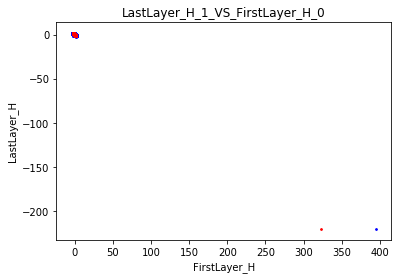

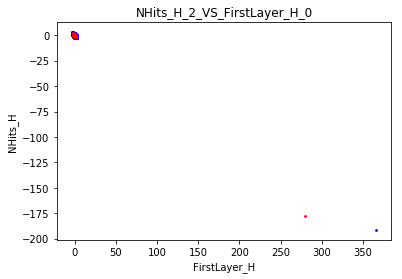

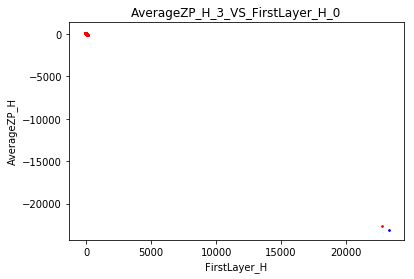

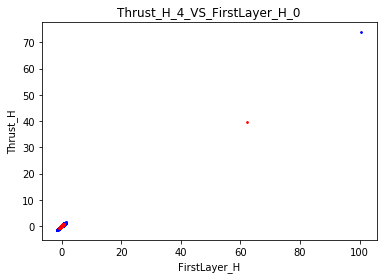

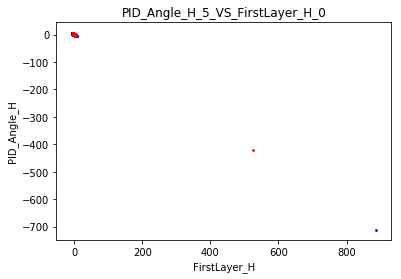

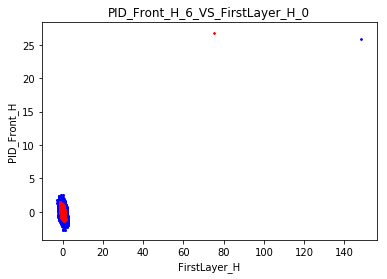

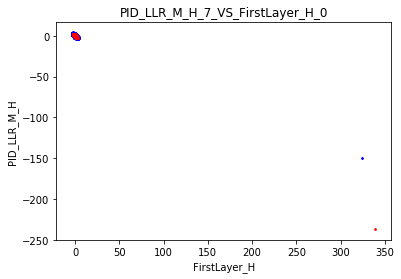

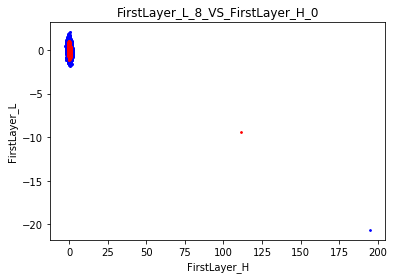

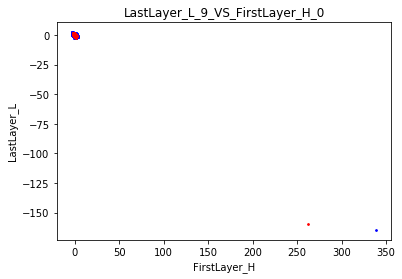

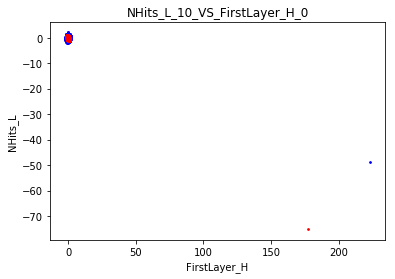

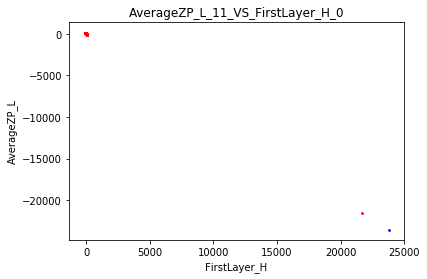

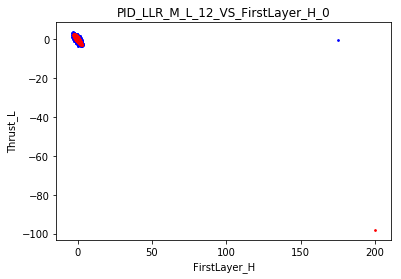

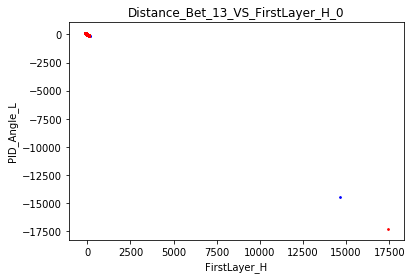

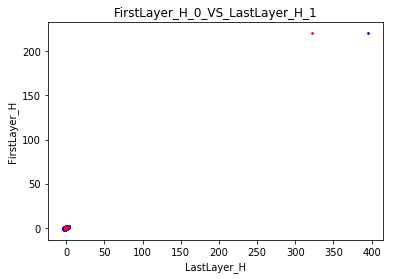

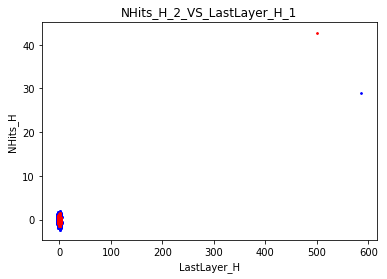

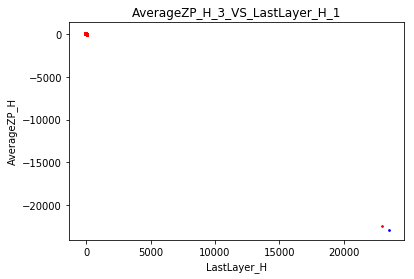

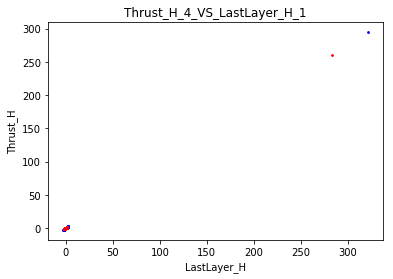

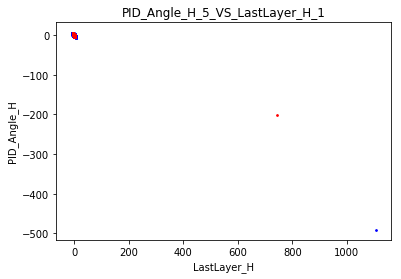

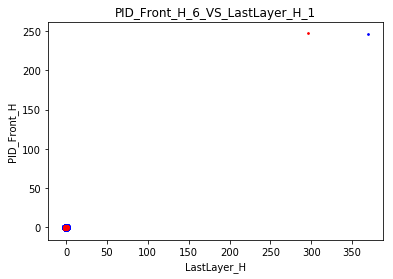

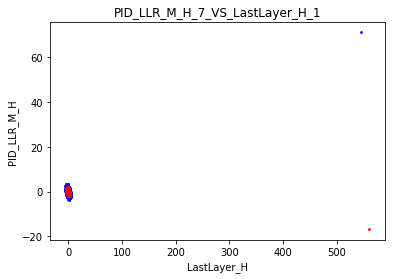

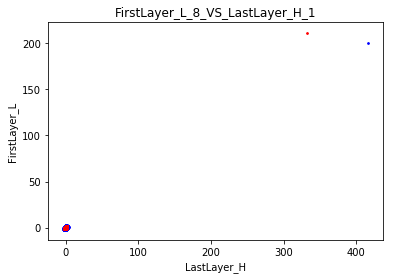

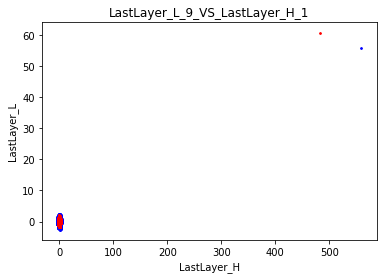

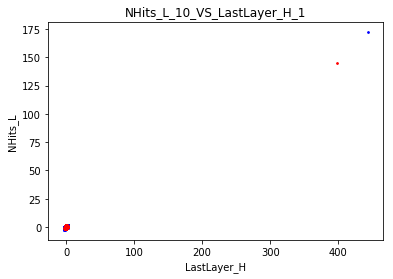

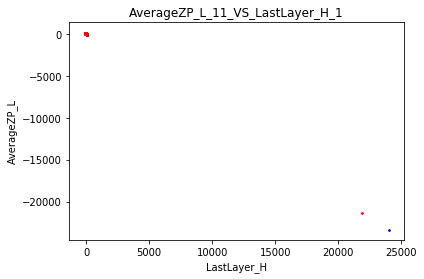

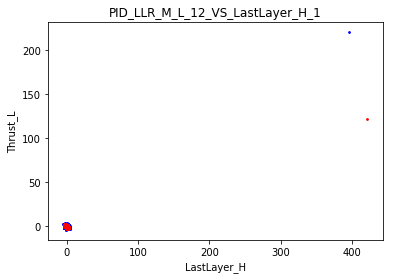

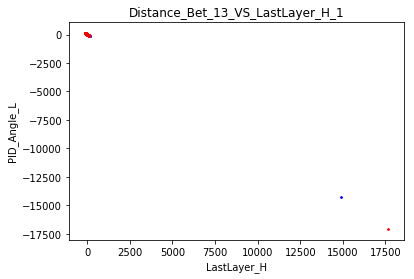

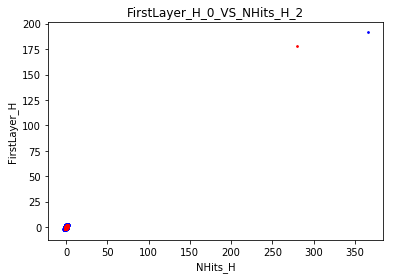

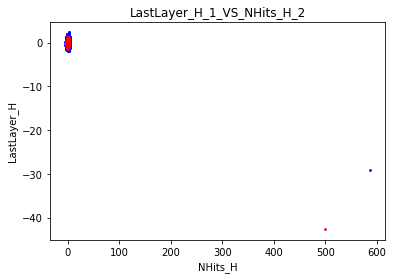

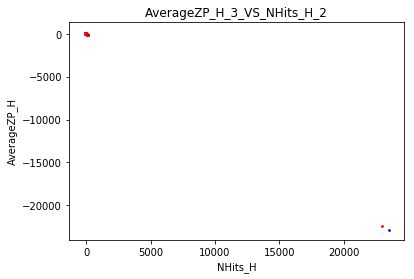

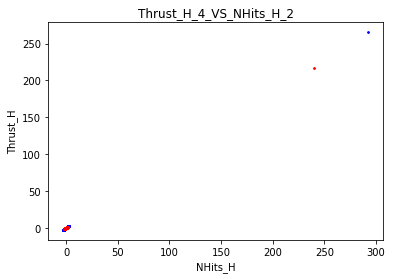

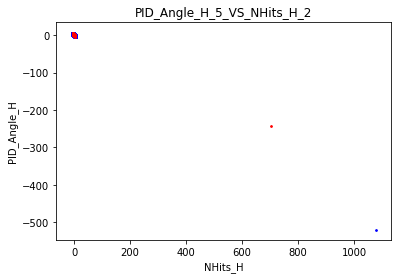

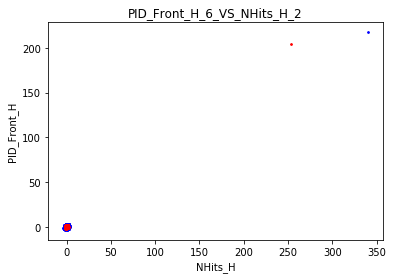

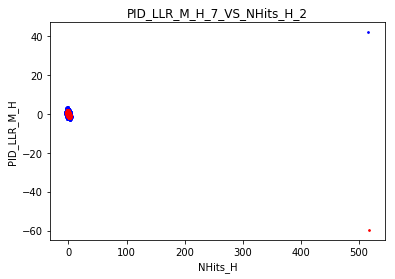

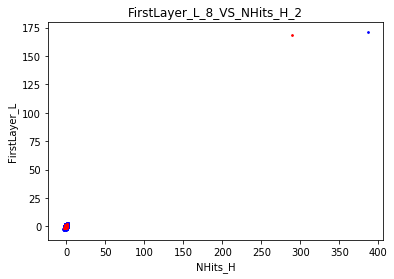

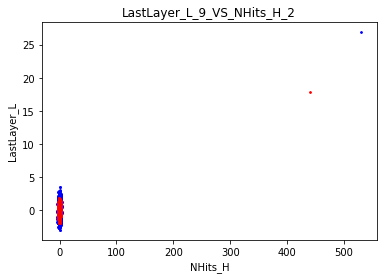

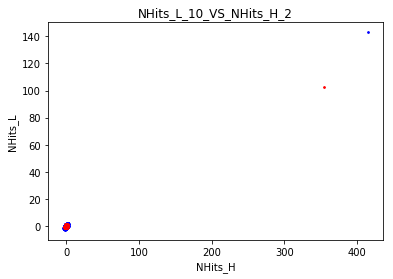

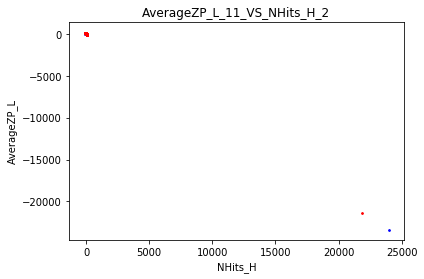

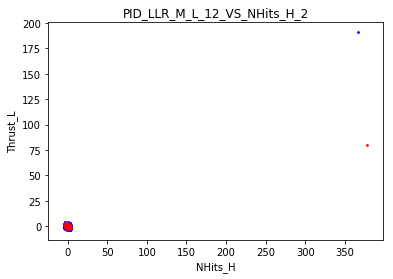

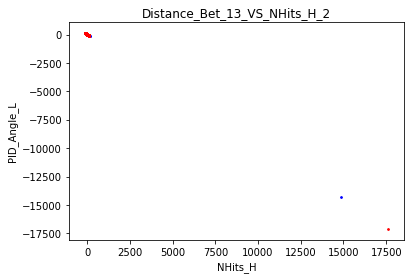

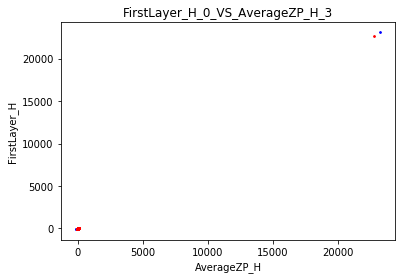

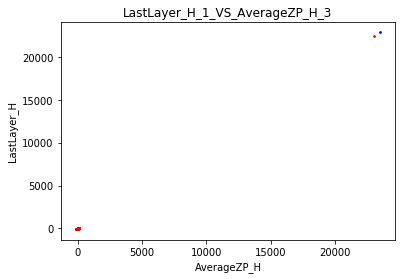

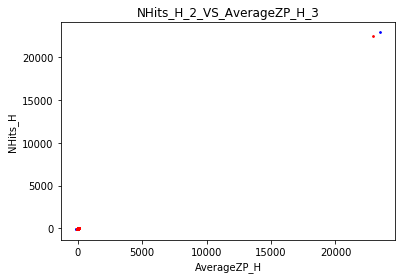

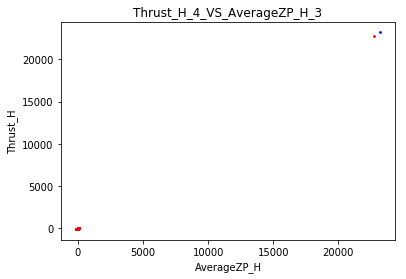

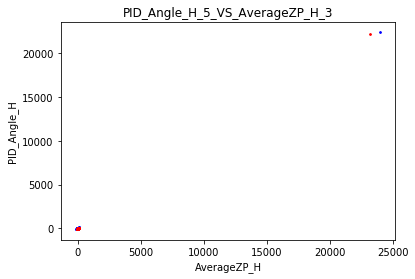

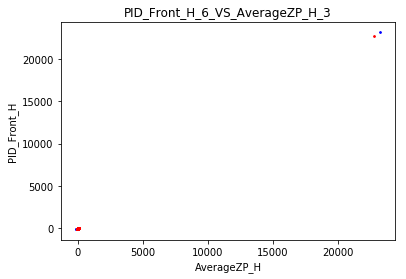

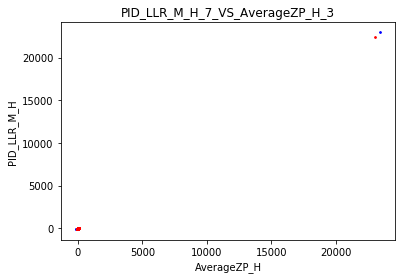

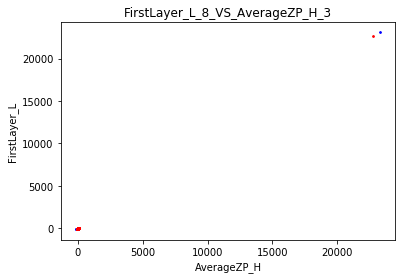

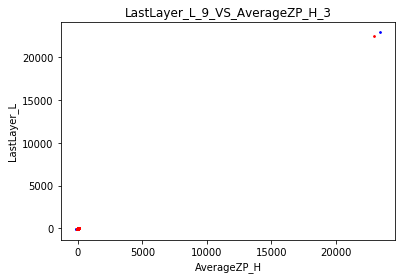

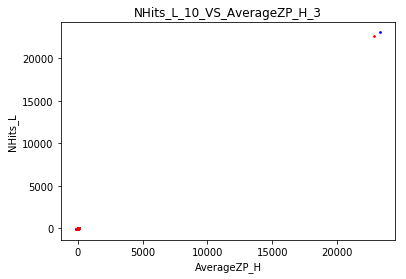

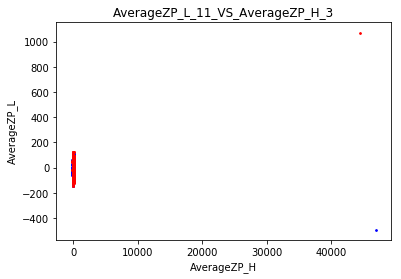

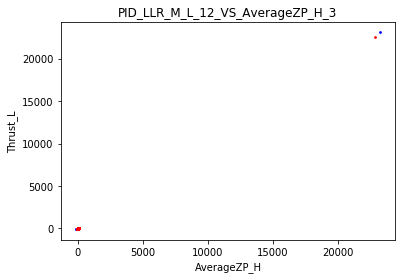

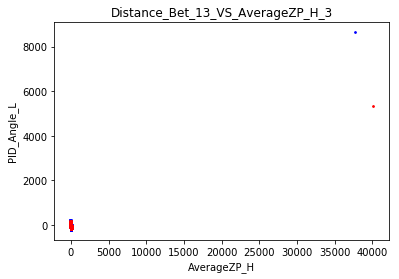

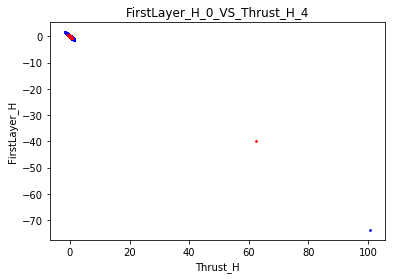

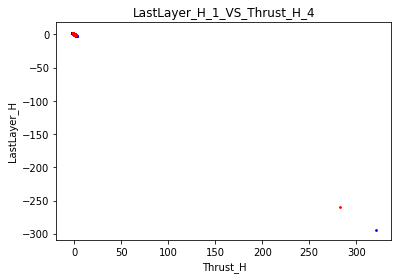

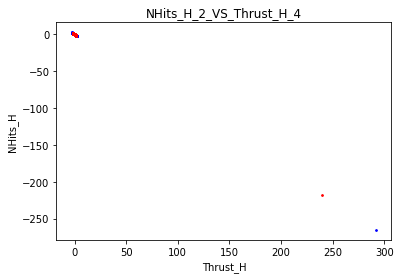

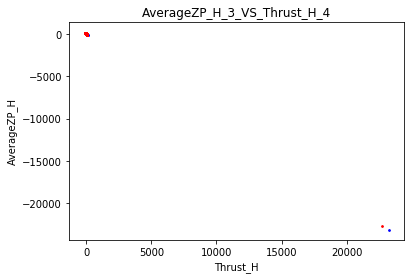

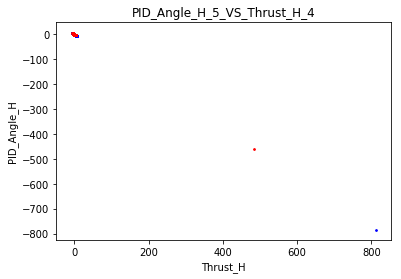

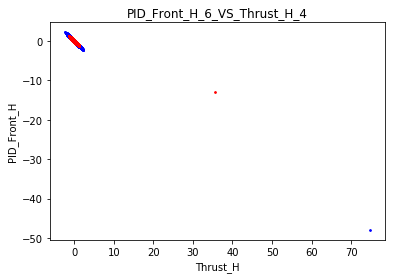

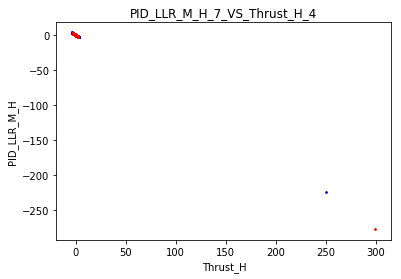

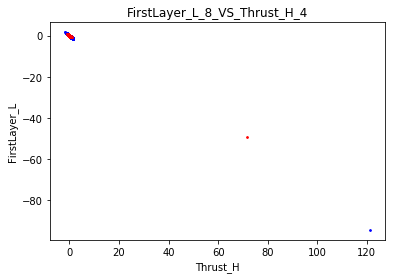

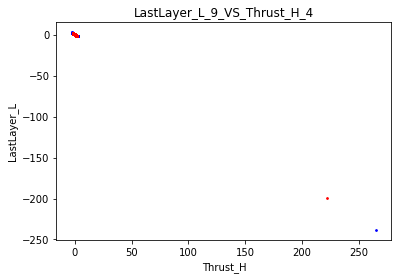

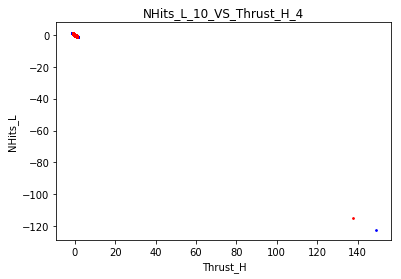

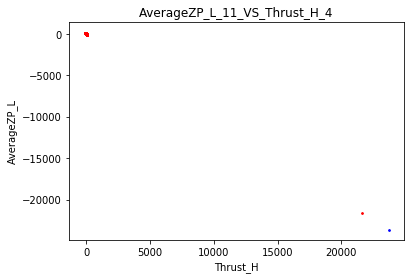

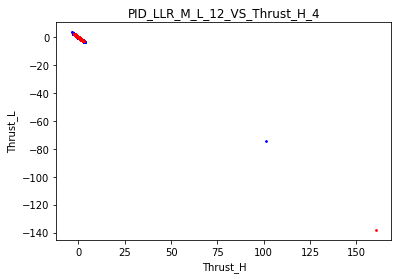

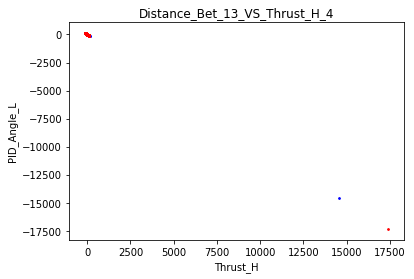

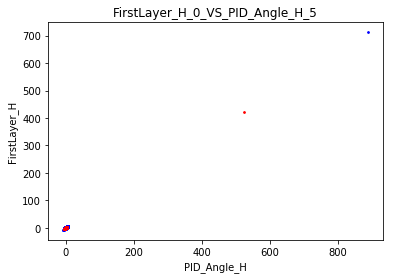

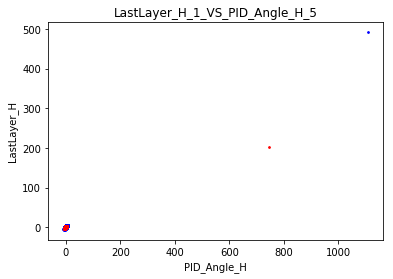

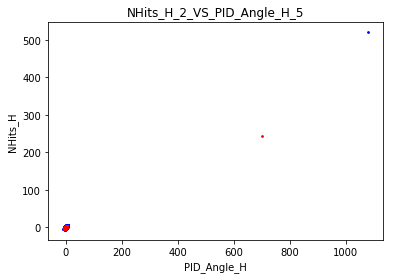

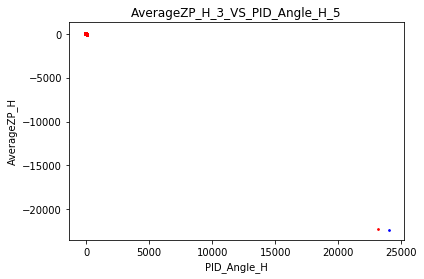

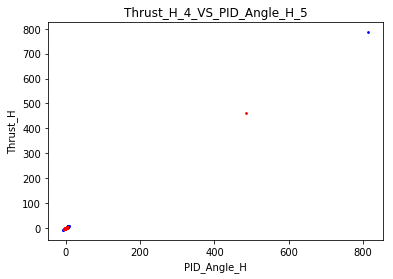

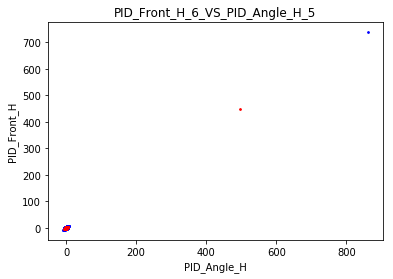

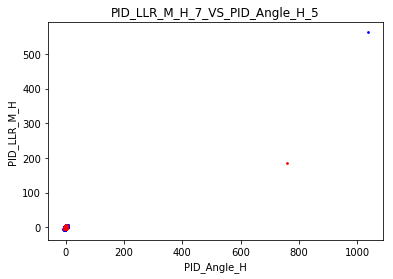

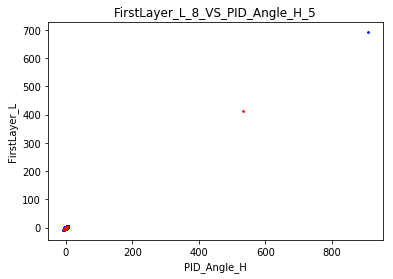

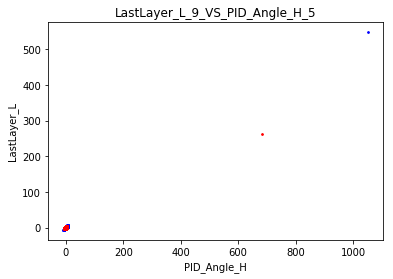

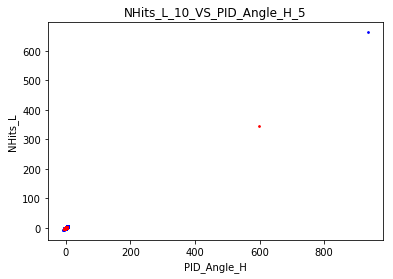

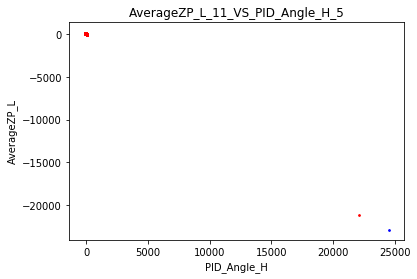

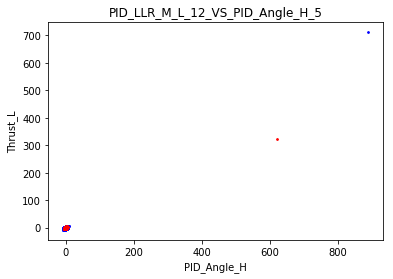

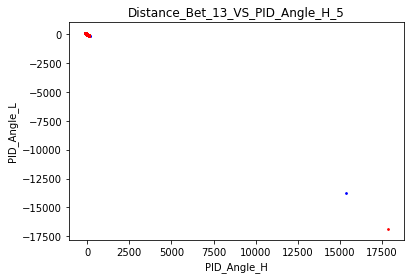

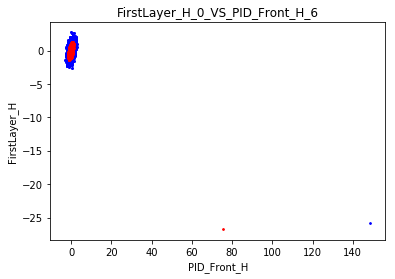

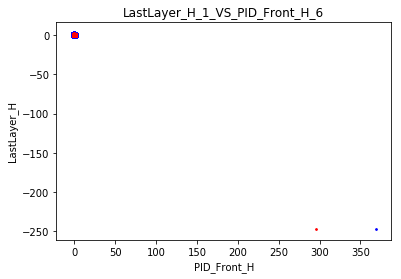

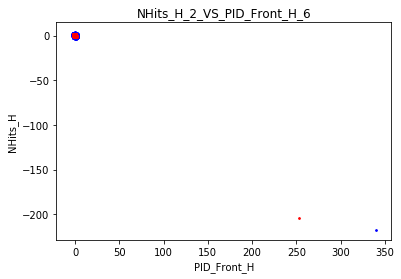

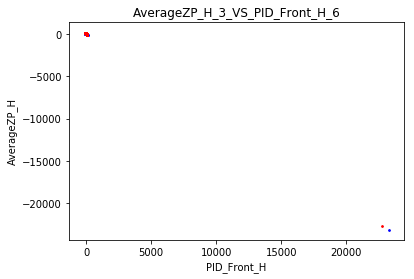

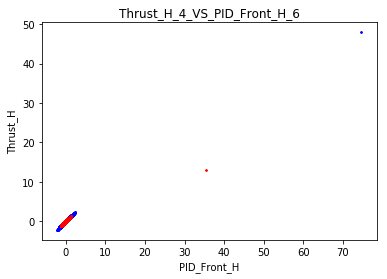

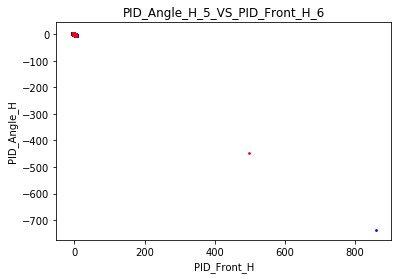

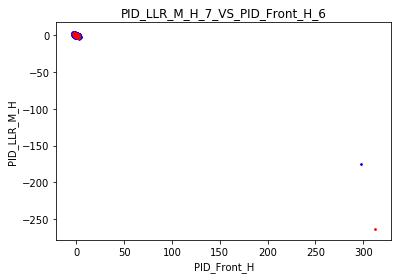

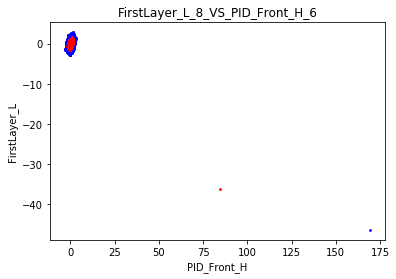

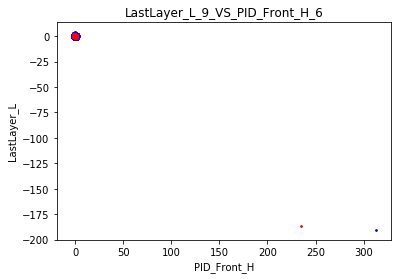

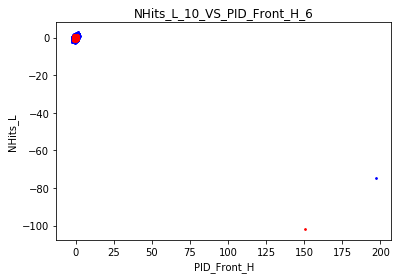

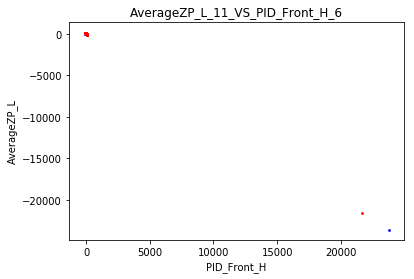

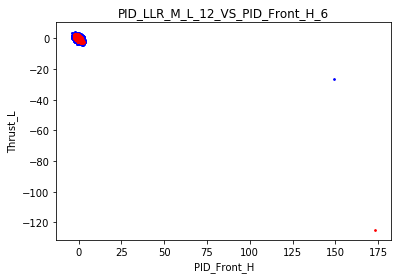

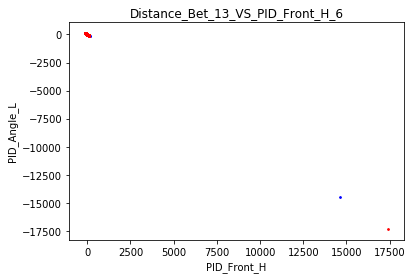

--- 64.1587746143341 seconds ---


In [26]:
#superplot!
size = 3
#save_results_to = '/home/willett/ANNs/HumanCleanedPlots/'

start_time = time.time()

for i in np.arange(7):
    for j in np.arange(14):
        if i!=j:
            #get title
            plottitle = CtitleArr[j]+"_"+str(j)+"_VS_"+CtitleArr[i]+"_"+str(i)
            
            #fourier getting
            background = np.vstack((UDBg[:,i],UDBg[:,j]))
            signal = np.vstack((UDSig[:,i],UDSig[:,j]))
            
            backgroundf = np.fft.fft2(background)
            signalf = np.fft.fft2(signal)
            
            backgroundf = np.real( backgroundf)
            signalf = np.real( signalf )
            
            
            
            plt.scatter(backgroundf[0],backgroundf[1],c="b",s=size)
            plt.scatter(signalf[0] ,signalf[1] ,c="r",s=size)
            plt.title(plottitle)
            plt.ylabel(titleArr[j])
            plt.xlabel(titleArr[i])
            #plt.savefig(save_results_to + plottitle, dpi = 300)
                
            plt.show()
            
print("--- %s seconds ---" % (time.time() - start_time)) 

In [27]:
signal.shape

(2, 37851)